In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Data

## Summary

https://www.kaggle.com/datasets/subigyanepal/college-experience-dataset/data

Sure, here's the information organized into a Markdown table:

| Dataset Category | Description | Users | Records | Columns |
|------------------|-------------|-------|---------|---------|
| **Demographics** | Gender and race | 216 | 216 | 3 |
| **EMA (Survey)** | General questions | 220 | 217,155 | 19 |
|                  | COVID-related questions | 181 | 16,511 | 12 |
| **Sensing**      | Sensing (~90 variables) | 220 | 216,065 | 651 |
|                  | Step counts (Walking steps) | 198 | 176,458 | 30 |

In [4]:
!ls ../archive

CleanShot 2024-05-10 at 10.28.03.png Readme.md
CleanShot 2024-05-10 at 10.28.27.png Sensing
Demographics                         college-experience-dataset.ipynb
EMA


In [5]:
!cat ../archive/Readme.md

This study gathered mobile sensing data, brain scans and survey responses from over 200 Dartmouth undergraduates throughout their four-year college experience. For further information about the study, please visit the Kaggle page: [College Experience Dataset](https://www.kaggle.com/datasets/subigyanepal/college-experience-dataset).

Inside each folder, you will find a data dictionary file detailing the contents, including descriptions of various variables, their ranges, units, etc. Reviewing this dictionary will help you understand the dataset comprehensively.

Should you utilize this dataset in your work, please use the following citation: 

Subigya Nepal, Wenjun Liu, Arvind Pillai, Weichen Wang, Vlado Vojdanovski, Jeremy F. Huckins, Courtney Rogers, Meghan L. Meyer, and Andrew T. Campbell. 2024. *Capturing the College Experience: A Four-Year Mobile Sensing Study of Mental Health, Resilience, and Behavior of College Students during the Pandemic*. Proc. ACM Interact. Mob. Wearable Ubiq

## Demographics

In [6]:
!ls ../archive/Demographics

Data Dictionary.csv demographics.csv


In [7]:
df_dem = pd.read_csv("../archive/Demographics/demographics.csv")

In [8]:
df_dem.head()

uid gender   race
0  3569e2f520db9014b4acc4227a6421c1   both  white
1  ac70fe1f8115ac361f2023269c011c3e      M  asian
2  3bb377ba0acb7d8916010184df36aa57      F  white
3  fa394f6d3d077bd5568fc3bc01580806      F  white
4  84120765740b5395aa49a2feb12fbb43      M  asian

In [9]:
len(df_dem)

216

In [10]:
# user count
df_dem.uid.nunique()

216

In [11]:
# count by gender
df_dem.gender.value_counts().to_frame()

count
gender       
F         146
M          69
both        1

In [12]:
# count by race
df_dem.race.value_counts().to_frame()

count
race                                
white                            135
asian                             53
more than one                     10
black                              8
other/hispanic                     6
american indian/alaska native      2
american indian/white              1
alaskan native/white               1

## EMA

### COVID EMA

In [13]:
!ls ../archive/EMA

Data Dictionary (COVID EMA).csv   covid_ema.csv
Data Dictionary (general EMA).csv general_ema.csv


In [15]:
# How each user responded to the survey
df_ema_cov = pd.read_csv("../archive/EMA/covid_ema.csv")

In [16]:
df_ema_cov.head()

uid       day  COVID-1  COVID-2  COVID-3  \
0  1ff6d7f34acb354430e7323a35ff7703  20200317      NaN      NaN      NaN   
1  1ff6d7f34acb354430e7323a35ff7703  20200320      5.0      7.0      6.0   
2  1ff6d7f34acb354430e7323a35ff7703  20200327      6.0      5.0      5.0   
3  1ff6d7f34acb354430e7323a35ff7703  20200331      3.0      6.0      4.0   
4  1ff6d7f34acb354430e7323a35ff7703  20200410      3.0      4.0      4.0   

   COVID-4  COVID-5  COVID-6  COVID-7  COVID-8  COVID-9  COVID-10  
0      NaN      NaN      NaN      NaN      NaN      NaN       NaN  
1      6.0      4.0      6.0      4.0      2.0      3.0       4.0  
2      4.0      3.0      5.0      3.0      3.0      3.0       4.0  
3      3.0      5.0      5.0      3.0      3.0      3.0       3.0  
4      2.0      2.0      4.0      2.0      4.0      2.0       1.0

In [18]:
# Question description
df_ema_cov_dict= pd.read_csv('../archive/EMA/Data Dictionary (COVID EMA).csv')

In [19]:
df_ema_cov_dict[['Variable', 'Description', 'Range']]

Variable  \
0        uid   
1        day   
2    COVID-1   
3    COVID-2   
4    COVID-3   
5    COVID-4   
6    COVID-5   
7    COVID-6   
8    COVID-7   
9    COVID-8   
10   COVID-9   
11  COVID-10   

                                                                                         Description  \
0                                                                                     Unique user ID   
1                                                                        Date in the format YYYYMMDD   
2                                                              How concerned are you about COVID-19?   
3          How much has the COVID-19 situation impacted your day to day activities in the last week?   
4   How much have you changed your behaviors in response to the COVID-19 situation in the last week?   
5                                             How concerned are you for yourself regarding COVID-19?   
6                                      How concerned are you for your classmates regarding COVID-19?   
7                                          How concerned are you for your family regarding COVID-19?   
8                                       How concerned are you about obtaining food, supplies, etc.?    
9                                                                         How supported do you feel?   
10                                                               How much have you supported others?   
11                 Is your social media usage: 1 (much less than normal) - 7 (much more than normal)   

                                                                              Range  
0                                                                               NaN  
1                                                                               NaN  
2                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Extremely  
3                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Very much  
4                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Very much  
5                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Extremely  
6                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Extremely  
7                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Extremely  
8                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Extremely  
9                        1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Extremely  
10                       1: Not at All;\n2;\n3;\n4: Somewhat;\n5;\n6;\n7: Very much  
11  1: Much less than normal;\n2;\n3;\n4: Normal;\n5;\n6;\n7: Much more than normal

In [20]:
len(df_ema_cov)

16511

In [21]:
df_ema_cov.shape

(16511, 12)

In [22]:
# user count
df_ema_cov.uid.nunique()

181

In [23]:
df_ema_cov.head()

uid       day  COVID-1  COVID-2  COVID-3  \
0  1ff6d7f34acb354430e7323a35ff7703  20200317      NaN      NaN      NaN   
1  1ff6d7f34acb354430e7323a35ff7703  20200320      5.0      7.0      6.0   
2  1ff6d7f34acb354430e7323a35ff7703  20200327      6.0      5.0      5.0   
3  1ff6d7f34acb354430e7323a35ff7703  20200331      3.0      6.0      4.0   
4  1ff6d7f34acb354430e7323a35ff7703  20200410      3.0      4.0      4.0   

   COVID-4  COVID-5  COVID-6  COVID-7  COVID-8  COVID-9  COVID-10  
0      NaN      NaN      NaN      NaN      NaN      NaN       NaN  
1      6.0      4.0      6.0      4.0      2.0      3.0       4.0  
2      4.0      3.0      5.0      3.0      3.0      3.0       4.0  
3      3.0      5.0      5.0      3.0      3.0      3.0       3.0  
4      2.0      2.0      4.0      2.0      4.0      2.0       1.0

In [24]:
# How many times each user responded to the survey? What is the duration and the interval?

df_ema_cov['day'] = pd.to_datetime(df_ema_cov['day'], format='%Y%m%d')

df_ema_cov_day = df_ema_cov.groupby('uid').agg(
    first_day=('day', 'min'),
    last_day=('day', 'max'),
    count=('day', 'count')
).reset_index().reset_index().sort_values(by='count', ascending=False)

df_ema_cov_day['duration'] = df_ema_cov_day['last_day'] - df_ema_cov_day['first_day']
df_ema_cov_day['average_interval_days'] = df_ema_cov_day.apply(
    lambda row: (row['duration'] / (row['count'] - 1)).days if row['count'] > 1 else 0,
    axis=1
)

In [25]:
df_ema_cov_day.head()

index                               uid  first_day   last_day  count  \
125    125  aeeb186fafcc356f44cae870555f4a0d 2020-03-18 2022-03-27    316   
142    142  c37f9221f44e9ca35a49180dc05a7587 2020-03-26 2022-04-24    295   
36      36  35cf1abf179310dc33907d953f590366 2020-03-21 2022-04-25    270   
18      18  1d2263527eed2a54e88d340fb8e55308 2020-03-20 2021-11-13    260   
85      85  7d2c632a05bbb03ca97555d61be83c41 2020-03-26 2022-04-23    257   

    duration  average_interval_days  
125 739 days                      2  
142 759 days                      2  
36  765 days                      2  
18  603 days                      2  
85  758 days                      2

<Axes: xlabel='user'>

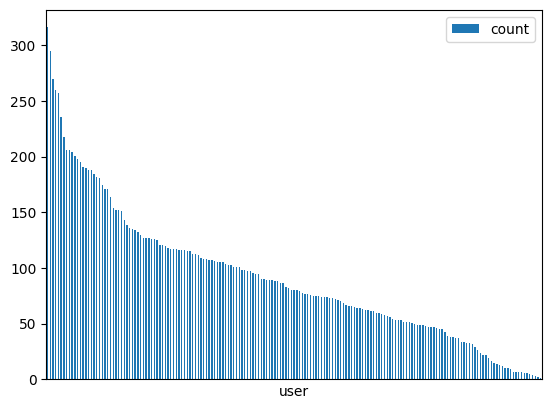

In [26]:
df_ema_cov_day.plot.bar(x='index', y='count', xlabel='user', xticks=[])

### General EMA

In [27]:
# How each user responded to the survey
df_ema_gen = pd.read_csv("../archive/EMA/general_ema.csv")

In [28]:
df_ema_gen.head()

uid       day  pam  phq4-1  phq4-2  phq4-3  \
0  1ff6d7f34acb354430e7323a35ff7703  20170907  7.0     2.0     2.0     2.0   
1  1ff6d7f34acb354430e7323a35ff7703  20170908  3.0     1.0     1.0     1.0   
2  1ff6d7f34acb354430e7323a35ff7703  20170909  NaN     NaN     NaN     NaN   
3  1ff6d7f34acb354430e7323a35ff7703  20170910  NaN     NaN     NaN     NaN   
4  1ff6d7f34acb354430e7323a35ff7703  20170911  2.0     1.0     1.0     1.0   

   phq4-4  phq4_resp_mean  phq4_resp_median  phq4_score  social_level  sse3-1  \
0     1.0        4.494280          4.409224         7.0           4.0     1.0   
1     1.0        4.634802          3.842536         4.0           2.0     2.0   
2     NaN             NaN               NaN         NaN           NaN     NaN   
3     NaN             NaN               NaN         NaN           NaN     NaN   
4     1.0      333.580775          2.885290         4.0           3.0     1.0   

   sse3-2  sse3-3  sse3-4  sse3_resp_mean  sse3_resp_median  stress  \
0     3.0     3.0     3.0        2.995924          2.989184     1.0   
1     3.0     3.0     3.0        6.340799          6.720536     4.0   
2     NaN     NaN     NaN             NaN               NaN     NaN   
3     NaN     NaN     NaN             NaN               NaN     NaN   
4     2.0     2.0     3.0        2.350849          2.317872     4.0   

   avg_ema_spent_time  
0           37.385698  
1           52.117245  
2                 NaN  
3                 NaN  
4         1351.983871

In [29]:
# Question description
df_ema_gen_dict= pd.read_csv('../archive/EMA/Data Dictionary (General EMA).csv')

In [30]:
df_ema_gen_dict[['Variable', 'Description', 'Range']]

Variable  \
0                  uid   
1                  day   
2                  pam   
3               phq4-1   
4               phq4-2   
5               phq4-3   
6               phq4-4   
7       phq4_resp_mean   
8     phq4_resp_median   
9           phq4_score   
10        social_level   
11              sse3-1   
12              sse3-2   
13              sse3-3   
14              sse3-4   
15      sse3_resp_mean   
16    sse3_resp_median   
17              stress   
18  avg_ema_spent_time   

                                                                                                                                                                                                    Description  \
0                                                                                                                                                                                                Unique user ID   
1                                                                                                                                                                                   Date in the format YYYYMMDD   
2   Photographic Affect Meter scores. The user chooses an image from 16 pictures. And the valence and arousal are calculated based on the rubric mentioned here: https://dl.acm.org/doi/10.1145/1978942.1979047   
3                                                                                        Over the last 2 weeks, how often have you been bothered by the following problems? Feeling nervous, anxious or on edge   
4                                                                                 Over the last 2 weeks, how often have you been bothered by the following problems? Not being able to stop or control worrying   
5                                                                                       Over the last 2 weeks, how often have you been bothered by the following problems? Feeling down, depressed or hopeless;   
6                                                                                Over the last 2 weeks, how often have you been bothered by the following problems? Little interest or pleasure in doing things   
7                                                                                                                                                                     Mean time spent on PHQ4 EMAs (in seconds)   
8                                                                                                                                                                   Median time spent on PHQ4 EMAs (in seconds)   
9                                                                                                                                                               Aggregated PHQ4 Score (Sum of PHQ4-1 to PHQ4-4)   
10                                                                                                                                                 Have you spent most of your time alone or with others today?   
11                                                                                                                                                      Right now, I worry about what other people think of me.   
12                                                                                                                                                                  Right now, I am pleased with my appearance.   
13                                                                                                                                                                        Right now, I feel as smart as others.   
14                                                                                                                                                                Right now, Overall, I feel good about myself.   
15                                                                                                                   

In [31]:
len(df_ema_gen)

217155

In [32]:
df_ema_gen.shape

(217155, 19)

In [33]:
# user count
df_ema_gen.uid.nunique()

220

In [34]:
# How many times each user responded to the survey? What is the duration and the interval?

df_ema_gen['day'] = pd.to_datetime(df_ema_gen['day'], format='%Y%m%d')

df_ema_gen_day = df_ema_gen.groupby('uid').agg(
    first_day=('day', 'min'),
    last_day=('day', 'max'),
    count=('day', 'count')
).reset_index().reset_index().sort_values(by='count', ascending=False)

df_ema_gen_day['duration'] = df_ema_gen_day['last_day'] - df_ema_gen_day['first_day']
df_ema_gen_day['average_interval_days'] = df_ema_gen_day.apply(
    lambda row: (row['duration'] / (row['count'] - 1)).days if row['count'] > 1 else 0,
    axis=1
)

In [35]:
df_ema_gen_day.head()

index                               uid  first_day   last_day  count  \
107    107  7e22b6d9cb821d7004409da02d95cb64 2017-10-29 2021-10-06   1413   
29      29  1ff6d7f34acb354430e7323a35ff7703 2017-09-07 2021-06-21   1376   
109    109  8391d8b451084771d0affcc26e34d773 2017-09-07 2021-06-17   1371   
199    199  e946e1f85b5de2dba4edcf1aebbfdc0a 2018-09-19 2022-06-23   1363   
140    140  a23be0935798553a76b4e74cfc1740f1 2017-09-07 2021-06-19   1362   

     duration  average_interval_days  
107 1438 days                      1  
29  1383 days                      1  
109 1379 days                      1  
199 1373 days                      1  
140 1381 days                      1

<Axes: xlabel='user'>

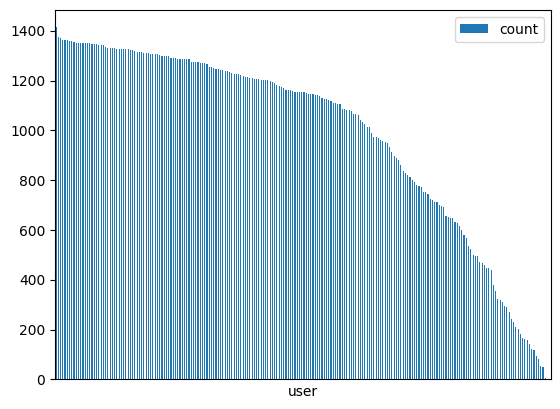

In [36]:
df_ema_gen_day.plot.bar(x='index', y='count', xlabel='user', xticks=[])

## Sensing

In [37]:
!ls archive/Sensing

ls: archive/Sensing: No such file or directory


### Sensing

In [38]:
# Daily summary of sensing data for each user
df_sens = pd.read_csv("../archive/Sensing/sensing.csv")

In [39]:
df_sens.head()

uid  is_ios       day  act_in_vehicle_ep_0  \
0  1ff6d7f34acb354430e7323a35ff7703       1  20170907                    0   
1  1ff6d7f34acb354430e7323a35ff7703       1  20170908                    0   
2  1ff6d7f34acb354430e7323a35ff7703       1  20170909                  110   
3  1ff6d7f34acb354430e7323a35ff7703       1  20170910                    0   
4  1ff6d7f34acb354430e7323a35ff7703       1  20170911                    0   

   act_in_vehicle_ep_1  act_in_vehicle_ep_2  act_in_vehicle_ep_3  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                  110                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   act_in_vehicle_hr_0  act_in_vehicle_hr_1  act_in_vehicle_hr_10  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   act_in_vehicle_hr_11  act_in_vehicle_hr_12  act_in_vehicle_hr_13  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   act_in_vehicle_hr_14  act_in_vehicle_hr_15  act_in_vehicle_hr_16  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   act_in_vehicle_hr_17  act_in_vehicle_hr_18  act_in_vehicle_hr_19  \
0                     0                     0                     0   
1                     0                     0                     0   
2                   110                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   act_in_vehicle_hr_2  act_in_vehicle_hr_20  act_in_vehicle_hr_21  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   act_in_vehicle_hr_22  act_in_vehicle_hr_23  act_in_vehicle_hr_3  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   act_in_vehicle_hr_4  act_in_vehicle_hr_5  act_in_vehicle_hr_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   act_in_vehicle_hr_7  act_in_vehicle_hr_8  act_in_vehicle_hr_9  \
0                    0                    0                    0   
1                    0                    0                    0   
2  

In [40]:
# Variables description
df_sens_dict = pd.read_csv("../archive/Sensing/Data Dictionary (Daily).csv")
df_sens_dict

Variable Feature Availability -- Android/iOS/All   \
0                               uid                                      All   
1                            is_ios                                      All   
2                               day                                      All   
3               act_in_vehicle_ep_0                                      All   
4               act_in_vehicle_ep_1                                      All   
5               act_in_vehicle_ep_2                                      All   
6               act_in_vehicle_ep_3                                      All   
7                  act_on_bike_ep_0                                      All   
8                  act_on_bike_ep_1                                      All   
9                  act_on_bike_ep_2                                      All   
10                 act_on_bike_ep_3                                      All   
11                 act_on_foot_ep_0                             Android only   
12                 act_on_foot_ep_1                             Android only   
13                 act_on_foot_ep_2                             Android only   
14                 act_on_foot_ep_3                             Android only   
15                 act_running_ep_0                                 iOS only   
16                 act_running_ep_1                                 iOS only   
17                 act_running_ep_2                                 iOS only   
18                 act_running_ep_3                                 iOS only   
19                   act_still_ep_0                                      All   
20                   act_still_ep_1                                      All   
21                   act_still_ep_2                                      All   
22                   act_still_ep_3                                      All   
23                 act_walking_ep_0                                 iOS only   
24                 act_walking_ep_1                                 iOS only   
25                 act_walking_ep_2                                 iOS only   
26                 act_walking_ep_3                                 iOS only   
27              audio_amp_mean_ep_0                             Android only   
28              audio_amp_mean_ep_1                             Android only   
29              audio_amp_mean_ep_2                             Android only   
30              audio_amp_mean_ep_3                             Android only   
31               audio_amp_std_ep_0                             Android only   
32               audio_amp_std_ep_1                             Android only   
33               audio_amp_std_ep_2                             Android only   
34               audio_amp_std_ep_3                             Android only   
35        audio_convo_duration_ep_0                             Android only   
36        audio_convo_duration_ep_1                             Android only   
37        audio_convo_duration_ep_2                             Android only   
38        audio_convo_duration_ep_3                             Android only   
39             audio_convo_num_ep_0                             Android only   
40             audio_convo_num_ep_1                             Android only   
41             audio_convo_num_ep_2                             Android only   
42             audio_convo_num_ep_3                             Android only   
43                 audio_voice_ep_0                             Android only   
44                 audio_voice_ep_1                             Android only   
45                 audio_voice_ep_2                             Android only   
46                 audio_voice_ep_3                             Android only   
47            call_in_duration_ep_0                             Android only   
48            call_in_duration_ep_1                             Android only   
49            call_in_durat

In [97]:
# Variables description 2
df_steps_dict = pd.read_csv("../archive/Sensing/Data Dictionary (Hourly).csv")
df_steps_dict

Variable Feature Availability -- Android/iOS/All   \
0                            uid                                      All   
1                         is_ios                                      All   
2                            day                                      All   
3            act_in_vehicle_hr_*                                      All   
4               act_on_bike_hr_*                                      All   
5               act_on_foot_hr_*                             Android only   
6               act_running_hr_*                                 iOS only   
7                 act_still_hr_*                                      All   
8               act_walking_hr_*                                 iOS only   
9               act_tilting_hr_*                             Android only   
10              act_unknown_hr_*                                      All   
11           audio_amp_mean_hr_*                             Android only   
12            audio_amp_std_hr_*                             Android only   
13     audio_convo_duration_hr_*                             Android only   
14          audio_convo_num_hr_*                             Android only   
15              audio_voice_hr_*                             Android only   
16                 loc_dist_hr_*                                      All   
17  loc_max_dis_from_campus_hr_*                                      All   
18            loc_visit_num_hr_*                                      All   
19   other_playing_duration_hr_*                                 iOS only   
20        other_playing_num_hr_*                                 iOS only   
21          unlock_duration_hr_*                                      All   
22               unlock_num_hr_*                                      All   
23                     step_hr_*                                 iOS only   

                                                                                                                                                                                                                        Description  \
0                                                                                                                                                                                                                    Unique user ID   
1                                                                                                                                                     Boolean indicating whether the user is an iOS user (1) or an Android user (0)   
2                                                                                                                                                                                                       Date in the format YYYYMMDD   
3                                                                                                            Activity duration in vehicle (* reflects numbers from 0 to 23 referring to each hour. 0 indicates 12 AM and 23, 11 PM)   
4                                                                                                                                                                                                         Activity duration on bike   
5                                                                                                                                                                                                        Activity duration on foot    
6                                                                                                                                                                                                         Activity duration running   
7                                                                                                                                                                                             Activity duration still (no movement)   
8                  

In [98]:
df_sens.shape

(216065, 653)

In [99]:
# How many types of variables (ignoring separated variables by time slots)
sens_cols = df_sens.columns.values.tolist()
distinct_sens_cols = set([re.sub(r'_(ep|hr)_\d+$', '', col) for col in sens_cols])

In [100]:
len(distinct_sens_cols)

92

In [101]:
distinct_sens_cols

{'act_in_vehicle',
 'act_on_bike',
 'act_on_foot',
 'act_running',
 'act_still',
 'act_tilting',
 'act_unknown',
 'act_walking',
 'audio_amp_mean',
 'audio_amp_std',
 'audio_convo_duration',
 'audio_convo_num',
 'audio_voice',
 'call_in_duration',
 'call_in_num',
 'call_miss_num',
 'call_out_duration',
 'call_out_num',
 'day',
 'is_ios',
 'light_mean',
 'light_std',
 'loc_dist',
 'loc_food_audio_amp',
 'loc_food_audio_voice',
 'loc_food_convo_duration',
 'loc_food_convo_num',
 'loc_food_dur',
 'loc_food_still',
 'loc_food_unlock_duration',
 'loc_food_unlock_num',
 'loc_health_dur',
 'loc_home_audio_amp',
 'loc_home_audio_voice',
 'loc_home_convo_duration',
 'loc_home_convo_num',
 'loc_home_dur',
 'loc_home_still',
 'loc_home_unlock_duration',
 'loc_home_unlock_num',
 'loc_leisure_dur',
 'loc_max_dis_from_campus',
 'loc_other_dorm_audio_amp',
 'loc_other_dorm_audio_voice',
 'loc_other_dorm_convo_duration',
 'loc_other_dorm_convo_num',
 'loc_other_dorm_dur',
 'loc_other_dorm_still',
 'lo

In [102]:
# num of rows and columns
df_sens.shape

(216065, 653)

In [103]:
# user count
df_sens.uid.nunique()

220

In [104]:
# Data collection duration and interval for each user

df_sens['day'] = pd.to_datetime(df_sens['day'], format='%Y%m%d')

df_sens_day = df_sens.groupby('uid').agg(
    first_day=('day', 'min'),
    last_day=('day', 'max'),
    count=('day', 'count')
).reset_index().reset_index().sort_values(by='count', ascending=False)

df_sens_day['duration'] = df_sens_day['last_day'] - df_sens_day['first_day']
df_sens_day['average_interval_days'] = df_sens_day.apply(
    lambda row: (row['duration'] / (row['count'] - 1)).days if row['count'] > 1 else 0,
    axis=1
)

In [105]:
df_sens_day.head()

index                               uid  first_day   last_day  count  \
29      29  1ff6d7f34acb354430e7323a35ff7703 2017-09-07 2021-06-15   1370   
109    109  8391d8b451084771d0affcc26e34d773 2017-09-07 2021-06-15   1369   
140    140  a23be0935798553a76b4e74cfc1740f1 2017-09-07 2021-06-15   1358   
192    192  e06024d216d36ef2d7cddc8a67cf77a7 2017-09-21 2021-06-15   1356   
102    102  79d8490ab94fc7cd6530b1f22593d708 2017-09-07 2021-06-15   1355   

     duration  average_interval_days  
29  1377 days                      1  
109 1377 days                      1  
140 1377 days                      1  
192 1363 days                      1  
102 1377 days                      1

<Axes: xlabel='user'>

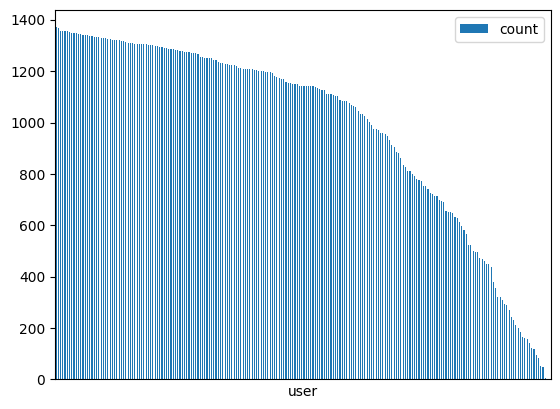

In [106]:
df_sens_day.plot.bar(x='index', y='count', xlabel='user', xticks=[])

### Steps

In [107]:
# Hourly count of steps for each user
df_steps = pd.read_csv("../archive/Sensing/steps.csv")

In [108]:
df_steps.head()

uid       day  step_ep_0  step_ep_1  \
0  1ff6d7f34acb354430e7323a35ff7703  20170907      15766        329   
1  1ff6d7f34acb354430e7323a35ff7703  20170908       9166       2484   
2  1ff6d7f34acb354430e7323a35ff7703  20170909       8443        973   
3  1ff6d7f34acb354430e7323a35ff7703  20170910      12949          0   
4  1ff6d7f34acb354430e7323a35ff7703  20170911       8368       2354   

   step_ep_2  step_ep_3  step_hr_0  step_hr_1  step_hr_2  step_hr_3  \
0      11847       3590          0          0          0          0   
1       3842       2840          0          0          0          0   
2       5505       1965          0          0          0          0   
3       8255       4694          0          0          0          0   
4       3319       2695          0          0          0          0   

   step_hr_4  step_hr_5  step_hr_6  step_hr_7  step_hr_8  step_hr_9  \
0          0          0          0          0        329       2120   
1          0          0          0          0       2484          0   
2          0          0          0          0        973        680   
3          0          0          0          0          0          0   
4          0          0          0        460       1894        715   

   step_hr_10  step_hr_11  step_hr_12  step_hr_13  step_hr_14  step_hr_15  \
0         355        1300        1296        1367        1168        3535   
1         360        1018        1459        1005           0           0   
2         933        1525         296          40           8        1304   
3        1434        1097        1719           0           0        1843   
4          82        2358           0           0         163           1   

   step_hr_16  step_hr_17  step_hr_18  step_hr_19  step_hr_20  step_hr_21  \
0         267         439         848        1299        1104         308   
1           0           0           0        1475         804         101   
2           0         719         282         253           0        1430   
3        2162           0        1273        1736        1327         358   
4           0           0        1247        1448           0           0   

   step_hr_22  step_hr_23  
0          31           0  
1         460           0  
2           0           0  
3           0           0  
4           0           0

In [109]:
df_steps.shape

(176458, 30)

In [110]:
# user count
df_steps.uid.nunique()

198

In [111]:
# Data collection duration and interval for each user

df_steps['day'] = pd.to_datetime(df_steps['day'], format='%Y%m%d')

df_steps_day = df_steps.groupby('uid').agg(
    first_day=('day', 'min'),
    last_day=('day', 'max'),
    count=('day', 'count')
).reset_index().reset_index().sort_values(by='count', ascending=False)

df_steps_day['duration'] = df_steps_day['last_day'] - df_steps_day['first_day']
df_steps_day['average_interval_days'] = df_steps_day.apply(
    lambda row: (row['duration'] / (row['count'] - 1)).days if row['count'] > 1 else 0,
    axis=1
)

In [112]:
df_steps_day.head()

index                               uid  first_day   last_day  count  \
96      96  7e22b6d9cb821d7004409da02d95cb64 2017-10-23 2021-09-28   1396   
38      38  2de8db6af975b72ac70440ede29e1cfb 2017-09-07 2021-06-15   1361   
92      92  79d8490ab94fc7cd6530b1f22593d708 2017-09-07 2021-06-14   1359   
173    173  e06024d216d36ef2d7cddc8a67cf77a7 2017-09-07 2021-06-14   1357   
81      81  64f2d26b3835e5fa744c35f1709e9c39 2018-09-19 2022-06-14   1354   

     duration  average_interval_days  
96  1436 days                      1  
38  1377 days                      1  
92  1376 days                      1  
173 1376 days                      1  
81  1364 days                      1

<Axes: xlabel='user'>

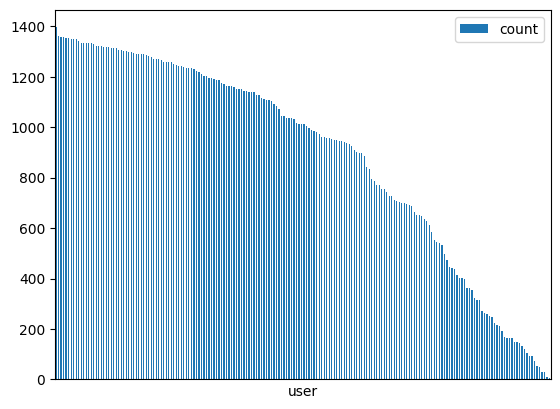

In [113]:
df_steps_day.plot.bar(x='index', y='count', xlabel='user', xticks=[])

# Data coverage

In [114]:
uid_dem = df_dem.uid.unique()
uid_ema_cov = df_ema_cov.uid.unique()
uid_ema_gen = df_ema_gen.uid.unique()
uid_sens = df_sens.uid.unique()
uid_steps = df_steps.uid.unique()

In [115]:
len(uid_dem), len(uid_ema_cov), len(uid_ema_gen), len(uid_sens), len(uid_steps),

(216, 181, 220, 220, 198)

In [116]:
df_uid_dem = pd.DataFrame(uid_dem, columns=['uid']).set_index('uid')
df_uid_dem['Demographic'] = True

df_uid_ema_cov = pd.DataFrame(uid_ema_cov, columns=['uid']).set_index('uid')
df_uid_ema_cov['EMA COVID'] = True

df_uid_ema_gen = pd.DataFrame(uid_ema_gen, columns=['uid']).set_index('uid')
df_uid_ema_gen['EMA General'] = True

df_uid_sens = pd.DataFrame(uid_sens, columns=['uid']).set_index('uid')
df_uid_sens['Sensing'] = True

df_uid_steps = pd.DataFrame(uid_steps, columns=['uid']).set_index('uid')
df_uid_steps['Steps'] = True

In [117]:
df_availability = pd.concat([df_uid_dem, df_uid_ema_cov, df_uid_ema_gen, df_uid_sens, df_uid_steps], join='outer', axis=1)
df_availability = df_availability.fillna(False)

In [118]:
df_availability.head()

Demographic  EMA COVID  EMA General  \
uid                                                                     
3569e2f520db9014b4acc4227a6421c1         True       True         True   
ac70fe1f8115ac361f2023269c011c3e         True      False         True   
3bb377ba0acb7d8916010184df36aa57         True       True         True   
fa394f6d3d077bd5568fc3bc01580806         True       True         True   
84120765740b5395aa49a2feb12fbb43         True       True         True   

                                  Sensing  Steps  
uid                                               
3569e2f520db9014b4acc4227a6421c1     True   True  
ac70fe1f8115ac361f2023269c011c3e     True  False  
3bb377ba0acb7d8916010184df36aa57     True   True  
fa394f6d3d077bd5568fc3bc01580806     True   True  
84120765740b5395aa49a2feb12fbb43     True   True

In [119]:
df_availability.sum()

Demographic    216
EMA COVID      181
EMA General    220
Sensing        220
Steps          198
dtype: int64

In [120]:
df_availability_all = df_availability.all(axis=1).to_frame()
df_availability_all.columns = ['All data available']

In [121]:
# Users whose data are all available
uid_complete = df_availability_all.loc[df_availability_all['All data available']].index

In [122]:
len(uid_complete)

162

In [123]:
all_uid = set(uid_dem.tolist() + uid_ema_cov.tolist() + uid_ema_gen.tolist() + uid_sens.tolist() + uid_steps.tolist())

In [124]:
len(all_uid)

220

In [125]:
# Intersection of user IDs for each data
intersect_counts = []
intersect_rates = []
for each in [uid_dem, uid_ema_cov, uid_ema_gen, uid_sens, uid_steps]:
    uids = set(each.tolist())
    for each2 in [uid_dem, uid_ema_cov, uid_ema_gen, uid_sens, uid_steps]:
        uids2 = set(each2.tolist())
        intersect = uids & uids2
        union = uids | uids2
        intersect_counts.append(len(intersect))
        intersect_rates.append(len(intersect) / len(union))

In [126]:
df_intersect = pd.DataFrame(
    np.array(intersect_counts).reshape(5, -1),
    columns=["Demographic", "EMA COVID", "EMA General", "Sensing", "Steps"],
    index=["Demographic", "EMA COVID", "EMA General", "Sensing", "Steps"]
)

In [127]:
df_intersect

Demographic  EMA COVID  EMA General  Sensing  Steps
Demographic          216        180          216      216    195
EMA COVID            180        181          181      181    163
EMA General          216        181          220      220    198
Sensing              216        181          220      220    198
Steps                195        163          198      198    198

In [128]:
df_intersect_rate = pd.DataFrame(
    np.array(intersect_rates).reshape(5, -1),
    columns=["Demographic", "EMA COVID", "EMA General", "Sensing", "Steps"],
    index=["Demographic", "EMA COVID", "EMA General", "Sensing", "Steps"]
)

In [129]:
df_intersect_rate

Demographic  EMA COVID  EMA General   Sensing     Steps
Demographic     1.000000   0.829493     0.981818  0.981818  0.890411
EMA COVID       0.829493   1.000000     0.822727  0.822727  0.754630
EMA General     0.981818   0.822727     1.000000  1.000000  0.900000
Sensing         0.981818   0.822727     1.000000  1.000000  0.900000
Steps           0.890411   0.754630     0.900000  0.900000  1.000000

# Join examples

In [130]:
df_ema_cov.head()

uid        day  COVID-1  COVID-2  COVID-3  \
0  1ff6d7f34acb354430e7323a35ff7703 2020-03-17      NaN      NaN      NaN   
1  1ff6d7f34acb354430e7323a35ff7703 2020-03-20      5.0      7.0      6.0   
2  1ff6d7f34acb354430e7323a35ff7703 2020-03-27      6.0      5.0      5.0   
3  1ff6d7f34acb354430e7323a35ff7703 2020-03-31      3.0      6.0      4.0   
4  1ff6d7f34acb354430e7323a35ff7703 2020-04-10      3.0      4.0      4.0   

   COVID-4  COVID-5  COVID-6  COVID-7  COVID-8  COVID-9  COVID-10  
0      NaN      NaN      NaN      NaN      NaN      NaN       NaN  
1      6.0      4.0      6.0      4.0      2.0      3.0       4.0  
2      4.0      3.0      5.0      3.0      3.0      3.0       4.0  
3      3.0      5.0      5.0      3.0      3.0      3.0       3.0  
4      2.0      2.0      4.0      2.0      4.0      2.0       1.0

In [131]:
df_ema_cov.merge(df_dem, on='uid', how='outer').head()

uid        day  COVID-1  COVID-2  COVID-3  \
0  1ff6d7f34acb354430e7323a35ff7703 2020-03-17      NaN      NaN      NaN   
1  1ff6d7f34acb354430e7323a35ff7703 2020-03-20      5.0      7.0      6.0   
2  1ff6d7f34acb354430e7323a35ff7703 2020-03-27      6.0      5.0      5.0   
3  1ff6d7f34acb354430e7323a35ff7703 2020-03-31      3.0      6.0      4.0   
4  1ff6d7f34acb354430e7323a35ff7703 2020-04-10      3.0      4.0      4.0   

   COVID-4  COVID-5  COVID-6  COVID-7  COVID-8  COVID-9  COVID-10 gender  \
0      NaN      NaN      NaN      NaN      NaN      NaN       NaN      F   
1      6.0      4.0      6.0      4.0      2.0      3.0       4.0      F   
2      4.0      3.0      5.0      3.0      3.0      3.0       4.0      F   
3      3.0      5.0      5.0      3.0      3.0      3.0       3.0      F   
4      2.0      2.0      4.0      2.0      4.0      2.0       1.0      F   

    race  
0  asian  
1  asian  
2  asian  
3  asian  
4  asian

In [132]:
df_ema_gen.head()

uid        day  pam  phq4-1  phq4-2  phq4-3  \
0  1ff6d7f34acb354430e7323a35ff7703 2017-09-07  7.0     2.0     2.0     2.0   
1  1ff6d7f34acb354430e7323a35ff7703 2017-09-08  3.0     1.0     1.0     1.0   
2  1ff6d7f34acb354430e7323a35ff7703 2017-09-09  NaN     NaN     NaN     NaN   
3  1ff6d7f34acb354430e7323a35ff7703 2017-09-10  NaN     NaN     NaN     NaN   
4  1ff6d7f34acb354430e7323a35ff7703 2017-09-11  2.0     1.0     1.0     1.0   

   phq4-4  phq4_resp_mean  phq4_resp_median  phq4_score  social_level  sse3-1  \
0     1.0        4.494280          4.409224         7.0           4.0     1.0   
1     1.0        4.634802          3.842536         4.0           2.0     2.0   
2     NaN             NaN               NaN         NaN           NaN     NaN   
3     NaN             NaN               NaN         NaN           NaN     NaN   
4     1.0      333.580775          2.885290         4.0           3.0     1.0   

   sse3-2  sse3-3  sse3-4  sse3_resp_mean  sse3_resp_median  stress  \
0     3.0     3.0     3.0        2.995924          2.989184     1.0   
1     3.0     3.0     3.0        6.340799          6.720536     4.0   
2     NaN     NaN     NaN             NaN               NaN     NaN   
3     NaN     NaN     NaN             NaN               NaN     NaN   
4     2.0     2.0     3.0        2.350849          2.317872     4.0   

   avg_ema_spent_time  
0           37.385698  
1           52.117245  
2                 NaN  
3                 NaN  
4         1351.983871

In [133]:
df_ema_gen.merge(df_dem, on='uid', how='outer').head()

uid        day  pam  phq4-1  phq4-2  phq4-3  \
0  1ff6d7f34acb354430e7323a35ff7703 2017-09-07  7.0     2.0     2.0     2.0   
1  1ff6d7f34acb354430e7323a35ff7703 2017-09-08  3.0     1.0     1.0     1.0   
2  1ff6d7f34acb354430e7323a35ff7703 2017-09-09  NaN     NaN     NaN     NaN   
3  1ff6d7f34acb354430e7323a35ff7703 2017-09-10  NaN     NaN     NaN     NaN   
4  1ff6d7f34acb354430e7323a35ff7703 2017-09-11  2.0     1.0     1.0     1.0   

   phq4-4  phq4_resp_mean  phq4_resp_median  phq4_score  social_level  sse3-1  \
0     1.0        4.494280          4.409224         7.0           4.0     1.0   
1     1.0        4.634802          3.842536         4.0           2.0     2.0   
2     NaN             NaN               NaN         NaN           NaN     NaN   
3     NaN             NaN               NaN         NaN           NaN     NaN   
4     1.0      333.580775          2.885290         4.0           3.0     1.0   

   sse3-2  sse3-3  sse3-4  sse3_resp_mean  sse3_resp_median  stress  \
0     3.0     3.0     3.0        2.995924          2.989184     1.0   
1     3.0     3.0     3.0        6.340799          6.720536     4.0   
2     NaN     NaN     NaN             NaN               NaN     NaN   
3     NaN     NaN     NaN             NaN               NaN     NaN   
4     2.0     2.0     3.0        2.350849          2.317872     4.0   

   avg_ema_spent_time gender   race  
0           37.385698      F  asian  
1           52.117245      F  asian  
2                 NaN      F  asian  
3                 NaN      F  asian  
4         1351.983871      F  asian

In [134]:
df_sens.head()

uid  is_ios        day  act_in_vehicle_ep_0  \
0  1ff6d7f34acb354430e7323a35ff7703       1 2017-09-07                    0   
1  1ff6d7f34acb354430e7323a35ff7703       1 2017-09-08                    0   
2  1ff6d7f34acb354430e7323a35ff7703       1 2017-09-09                  110   
3  1ff6d7f34acb354430e7323a35ff7703       1 2017-09-10                    0   
4  1ff6d7f34acb354430e7323a35ff7703       1 2017-09-11                    0   

   act_in_vehicle_ep_1  act_in_vehicle_ep_2  act_in_vehicle_ep_3  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                  110                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   act_in_vehicle_hr_0  act_in_vehicle_hr_1  act_in_vehicle_hr_10  \
0                    0                    0                     0   
1                    0                    0                     0   
2                    0                    0                     0   
3                    0                    0                     0   
4                    0                    0                     0   

   act_in_vehicle_hr_11  act_in_vehicle_hr_12  act_in_vehicle_hr_13  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   act_in_vehicle_hr_14  act_in_vehicle_hr_15  act_in_vehicle_hr_16  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   act_in_vehicle_hr_17  act_in_vehicle_hr_18  act_in_vehicle_hr_19  \
0                     0                     0                     0   
1                     0                     0                     0   
2                   110                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   act_in_vehicle_hr_2  act_in_vehicle_hr_20  act_in_vehicle_hr_21  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   act_in_vehicle_hr_22  act_in_vehicle_hr_23  act_in_vehicle_hr_3  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   act_in_vehicle_hr_4  act_in_vehicle_hr_5  act_in_vehicle_hr_6  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   act_in_vehicle_hr_7  act_in_vehicle_hr_8  act_in_vehicle_hr_9  \
0                    0                    0                    0   
1                    0                    0                    0 

In [135]:
df_sens.merge(df_dem, on='uid', how='outer').head()[['uid', 'is_ios', 'gender', 'race']]

uid  is_ios gender   race
0  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
1  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
2  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
3  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
4  1ff6d7f34acb354430e7323a35ff7703       1      F  asian

In [136]:
df_steps.head()

uid        day  step_ep_0  step_ep_1  \
0  1ff6d7f34acb354430e7323a35ff7703 2017-09-07      15766        329   
1  1ff6d7f34acb354430e7323a35ff7703 2017-09-08       9166       2484   
2  1ff6d7f34acb354430e7323a35ff7703 2017-09-09       8443        973   
3  1ff6d7f34acb354430e7323a35ff7703 2017-09-10      12949          0   
4  1ff6d7f34acb354430e7323a35ff7703 2017-09-11       8368       2354   

   step_ep_2  step_ep_3  step_hr_0  step_hr_1  step_hr_2  step_hr_3  \
0      11847       3590          0          0          0          0   
1       3842       2840          0          0          0          0   
2       5505       1965          0          0          0          0   
3       8255       4694          0          0          0          0   
4       3319       2695          0          0          0          0   

   step_hr_4  step_hr_5  step_hr_6  step_hr_7  step_hr_8  step_hr_9  \
0          0          0          0          0        329       2120   
1          0          0          0          0       2484          0   
2          0          0          0          0        973        680   
3          0          0          0          0          0          0   
4          0          0          0        460       1894        715   

   step_hr_10  step_hr_11  step_hr_12  step_hr_13  step_hr_14  step_hr_15  \
0         355        1300        1296        1367        1168        3535   
1         360        1018        1459        1005           0           0   
2         933        1525         296          40           8        1304   
3        1434        1097        1719           0           0        1843   
4          82        2358           0           0         163           1   

   step_hr_16  step_hr_17  step_hr_18  step_hr_19  step_hr_20  step_hr_21  \
0         267         439         848        1299        1104         308   
1           0           0           0        1475         804         101   
2           0         719         282         253           0        1430   
3        2162           0        1273        1736        1327         358   
4           0           0        1247        1448           0           0   

   step_hr_22  step_hr_23  
0          31           0  
1         460           0  
2           0           0  
3           0           0  
4           0           0

In [137]:
df_steps.merge(df_dem, on='uid', how='outer').head()[['uid', 'step_ep_0', 'gender', 'race']]

uid  step_ep_0 gender   race
0  1ff6d7f34acb354430e7323a35ff7703    15766.0      F  asian
1  1ff6d7f34acb354430e7323a35ff7703     9166.0      F  asian
2  1ff6d7f34acb354430e7323a35ff7703     8443.0      F  asian
3  1ff6d7f34acb354430e7323a35ff7703    12949.0      F  asian
4  1ff6d7f34acb354430e7323a35ff7703     8368.0      F  asian

# Column reduction

## Sensing

In [138]:
# 651 columns
df_sens.shape

(216065, 653)

In [139]:
# df_sens.columns.tolist()

sens_cols = [
    'uid',
    'is_ios',
    'day',

    'act_in_vehicle_ep_0',
    # 'act_in_vehicle_ep_1',
    # 'act_in_vehicle_ep_2',
    # 'act_in_vehicle_ep_3',
    # 'act_in_vehicle_hr_0',
    # 'act_in_vehicle_hr_1',
    # 'act_in_vehicle_hr_10',
    # 'act_in_vehicle_hr_11',
    # 'act_in_vehicle_hr_12',
    # 'act_in_vehicle_hr_13',
    # 'act_in_vehicle_hr_14',
    # 'act_in_vehicle_hr_15',
    # 'act_in_vehicle_hr_16',
    # 'act_in_vehicle_hr_17',
    # 'act_in_vehicle_hr_18',
    # 'act_in_vehicle_hr_19',
    # 'act_in_vehicle_hr_2',
    # 'act_in_vehicle_hr_20',
    # 'act_in_vehicle_hr_21',
    # 'act_in_vehicle_hr_22',
    # 'act_in_vehicle_hr_23',
    # 'act_in_vehicle_hr_3',
    # 'act_in_vehicle_hr_4',
    # 'act_in_vehicle_hr_5',
    # 'act_in_vehicle_hr_6',
    # 'act_in_vehicle_hr_7',
    # 'act_in_vehicle_hr_8',
    # 'act_in_vehicle_hr_9',
    
    'act_on_bike_ep_0',
    # 'act_on_bike_ep_1',
    # 'act_on_bike_ep_2',
    # 'act_on_bike_ep_3',
    # 'act_on_bike_hr_0',
    # 'act_on_bike_hr_1',
    # 'act_on_bike_hr_10',
    # 'act_on_bike_hr_11',
    # 'act_on_bike_hr_12',
    # 'act_on_bike_hr_13',
    # 'act_on_bike_hr_14',
    # 'act_on_bike_hr_15',
    # 'act_on_bike_hr_16',
    # 'act_on_bike_hr_17',
    # 'act_on_bike_hr_18',
    # 'act_on_bike_hr_19',
    # 'act_on_bike_hr_2',
    # 'act_on_bike_hr_20',
    # 'act_on_bike_hr_21',
    # 'act_on_bike_hr_22',
    # 'act_on_bike_hr_23',
    # 'act_on_bike_hr_3',
    # 'act_on_bike_hr_4',
    # 'act_on_bike_hr_5',
    # 'act_on_bike_hr_6',
    # 'act_on_bike_hr_7',
    # 'act_on_bike_hr_8',
    # 'act_on_bike_hr_9',

    'act_on_foot_ep_0',
    # 'act_on_foot_ep_1',
    # 'act_on_foot_ep_2',
    # 'act_on_foot_ep_3',
    # 'act_on_foot_hr_0',
    # 'act_on_foot_hr_1',
    # 'act_on_foot_hr_10',
    # 'act_on_foot_hr_11',
    # 'act_on_foot_hr_12',
    # 'act_on_foot_hr_13',
    # 'act_on_foot_hr_14',
    # 'act_on_foot_hr_15',
    # 'act_on_foot_hr_16',
    # 'act_on_foot_hr_17',
    # 'act_on_foot_hr_18',
    # 'act_on_foot_hr_19',
    # 'act_on_foot_hr_2',
    # 'act_on_foot_hr_20',
    # 'act_on_foot_hr_21',
    # 'act_on_foot_hr_22',
    # 'act_on_foot_hr_23',
    # 'act_on_foot_hr_3',
    # 'act_on_foot_hr_4',
    # 'act_on_foot_hr_5',
    # 'act_on_foot_hr_6',
    # 'act_on_foot_hr_7',
    # 'act_on_foot_hr_8',
    # 'act_on_foot_hr_9',

    'act_running_ep_0',
    # 'act_running_ep_1',
    # 'act_running_ep_2',
    # 'act_running_ep_3',
    # 'act_running_hr_0',
    # 'act_running_hr_1',
    # 'act_running_hr_10',
    # 'act_running_hr_11',
    # 'act_running_hr_12',
    # 'act_running_hr_13',
    # 'act_running_hr_14',
    # 'act_running_hr_15',
    # 'act_running_hr_16',
    # 'act_running_hr_17',
    # 'act_running_hr_18',
    # 'act_running_hr_19',
    # 'act_running_hr_2',
    # 'act_running_hr_20',
    # 'act_running_hr_21',
    # 'act_running_hr_22',
    # 'act_running_hr_23',
    # 'act_running_hr_3',
    # 'act_running_hr_4',
    # 'act_running_hr_5',
    # 'act_running_hr_6',
    # 'act_running_hr_7',
    # 'act_running_hr_8',
    # 'act_running_hr_9',

    'act_still_ep_0',
    # 'act_still_ep_1',
    # 'act_still_ep_2',
    # 'act_still_ep_3',
    # 'act_still_hr_0',
    # 'act_still_hr_1',
    # 'act_still_hr_10',
    # 'act_still_hr_11',
    # 'act_still_hr_12',
    # 'act_still_hr_13',
    # 'act_still_hr_14',
    # 'act_still_hr_15',
    # 'act_still_hr_16',
    # 'act_still_hr_17',
    # 'act_still_hr_18',
    # 'act_still_hr_19',
    # 'act_still_hr_2',
    # 'act_still_hr_20',
    # 'act_still_hr_21',
    # 'act_still_hr_22',
    # 'act_still_hr_23',
    # 'act_still_hr_3',
    # 'act_still_hr_4',
    # 'act_still_hr_5',
    # 'act_still_hr_6',
    # 'act_still_hr_7',
    # 'act_still_hr_8',
    # 'act_still_hr_9',
    
    # NO _ep_* -> calculate it later
    # 'act_tilting_hr_0',
    # 'act_tilting_hr_1',
    # 'act_tilting_hr_10',
    # 'act_tilting_hr_11',
    # 'act_tilting_hr_12',
    # 'act_tilting_hr_13',
    # 'act_tilting_hr_14',
    # 'act_tilting_hr_15',
    # 'act_tilting_hr_16',
    # 'act_tilting_hr_17',
    # 'act_tilting_hr_18',
    # 'act_tilting_hr_19',
    # 'act_tilting_hr_2',
    # 'act_tilting_hr_20',
    # 'act_tilting_hr_21',
    # 'act_tilting_hr_22',
    # 'act_tilting_hr_23',
    # 'act_tilting_hr_3',
    # 'act_tilting_hr_4',
    # 'act_tilting_hr_5',
    # 'act_tilting_hr_6',
    # 'act_tilting_hr_7',
    # 'act_tilting_hr_8',
    # 'act_tilting_hr_9',

    # NO _ep_* -> calculate it later
    # 'act_unknown_hr_0',
    # 'act_unknown_hr_1',
    # 'act_unknown_hr_10',
    # 'act_unknown_hr_11',
    # 'act_unknown_hr_12',
    # 'act_unknown_hr_13',
    # 'act_unknown_hr_14',
    # 'act_unknown_hr_15',
    # 'act_unknown_hr_16',
    # 'act_unknown_hr_17',
    # 'act_unknown_hr_18',
    # 'act_unknown_hr_19',
    # 'act_unknown_hr_2',
    # 'act_unknown_hr_20',
    # 'act_unknown_hr_21',
    # 'act_unknown_hr_22',
    # 'act_unknown_hr_23',
    # 'act_unknown_hr_3',
    # 'act_unknown_hr_4',
    # 'act_unknown_hr_5',
    # 'act_unknown_hr_6',
    # 'act_unknown_hr_7',
    # 'act_unknown_hr_8',
    # 'act_unknown_hr_9',

    'act_walking_ep_0',
    # 'act_walking_ep_1',
    # 'act_walking_ep_2',
    # 'act_walking_ep_3',
    # 'act_walking_hr_0',
    # 'act_walking_hr_1',
    # 'act_walking_hr_10',
    # 'act_walking_hr_11',
    # 'act_walking_hr_12',
    # 'act_walking_hr_13',
    # 'act_walking_hr_14',
    # 'act_walking_hr_15',
    # 'act_walking_hr_16',
    # 'act_walking_hr_17',
    # 'act_walking_hr_18',
    # 'act_walking_hr_19',
    # 'act_walking_hr_2',
    # 'act_walking_hr_20',
    # 'act_walking_hr_21',
    # 'act_walking_hr_22',
    # 'act_walking_hr_23',
    # 'act_walking_hr_3',
    # 'act_walking_hr_4',
    # 'act_walking_hr_5',
    # 'act_walking_hr_6',
    # 'act_walking_hr_7',
    # 'act_walking_hr_8',
    # 'act_walking_hr_9',
    
    'audio_amp_mean_ep_0',
    # 'audio_amp_mean_ep_1',
    # 'audio_amp_mean_ep_2',
    # 'audio_amp_mean_ep_3',
    # 'audio_amp_mean_hr_0',
    # 'audio_amp_mean_hr_1',
    # 'audio_amp_mean_hr_10',
    # 'audio_amp_mean_hr_11',
    # 'audio_amp_mean_hr_12',
    # 'audio_amp_mean_hr_13',
    # 'audio_amp_mean_hr_14',
    # 'audio_amp_mean_hr_15',
    # 'audio_amp_mean_hr_16',
    # 'audio_amp_mean_hr_17',
    # 'audio_amp_mean_hr_18',
    # 'audio_amp_mean_hr_19',
    # 'audio_amp_mean_hr_2',
    # 'audio_amp_mean_hr_20',
    # 'audio_amp_mean_hr_21',
    # 'audio_amp_mean_hr_22',
    # 'audio_amp_mean_hr_23',
    # 'audio_amp_mean_hr_3',
    # 'audio_amp_mean_hr_4',
    # 'audio_amp_mean_hr_5',
    # 'audio_amp_mean_hr_6',
    # 'audio_amp_mean_hr_7',
    # 'audio_amp_mean_hr_8',
    # 'audio_amp_mean_hr_9',
    
    'audio_amp_std_ep_0',
    # 'audio_amp_std_ep_1',
    # 'audio_amp_std_ep_2',
    # 'audio_amp_std_ep_3',
    # 'audio_amp_std_hr_0',
    # 'audio_amp_std_hr_1',
    # 'audio_amp_std_hr_10',
    # 'audio_amp_std_hr_11',
    # 'audio_amp_std_hr_12',
    # 'audio_amp_std_hr_13',
    # 'audio_amp_std_hr_14',
    # 'audio_amp_std_hr_15',
    # 'audio_amp_std_hr_16',
    # 'audio_amp_std_hr_17',
    # 'audio_amp_std_hr_18',
    # 'audio_amp_std_hr_19',
    # 'audio_amp_std_hr_2',
    # 'audio_amp_std_hr_20',
    # 'audio_amp_std_hr_21',
    # 'audio_amp_std_hr_22',
    # 'audio_amp_std_hr_23',
    # 'audio_amp_std_hr_3',
    # 'audio_amp_std_hr_4',
    # 'audio_amp_std_hr_5',
    # 'audio_amp_std_hr_6',
    # 'audio_amp_std_hr_7',
    # 'audio_amp_std_hr_8',
    # 'audio_amp_std_hr_9',
    
    'audio_convo_duration_ep_0',
    # 'audio_convo_duration_ep_1',
    # 'audio_convo_duration_ep_2',
    # 'audio_convo_duration_ep_3',
    # 'audio_convo_duration_hr_0',
    # 'audio_convo_duration_hr_1',
    # 'audio_convo_duration_hr_10',
    # 'audio_convo_duration_hr_11',
    # 'audio_convo_duration_hr_12',
    # 'audio_convo_duration_hr_13',
    # 'audio_convo_duration_hr_14',
    # 'audio_convo_duration_hr_15',
    # 'audio_convo_duration_hr_16',
    # 'audio_convo_duration_hr_17',
    # 'audio_convo_duration_hr_18',
    # 'audio_convo_duration_hr_19',
    # 'audio_convo_duration_hr_2',
    # 'audio_convo_duration_hr_20',
    # 'audio_convo_duration_hr_21',
    # 'audio_convo_duration_hr_22',
    # 'audio_convo_duration_hr_23',
    # 'audio_convo_duration_hr_3',
    # 'audio_convo_duration_hr_4',
    # 'audio_convo_duration_hr_5',
    # 'audio_convo_duration_hr_6',
    # 'audio_convo_duration_hr_7',
    # 'audio_convo_duration_hr_8',
    # 'audio_convo_duration_hr_9',
    
    'audio_convo_num_ep_0',
    # 'audio_convo_num_ep_1',
    # 'audio_convo_num_ep_2',
    # 'audio_convo_num_ep_3',
    # 'audio_convo_num_hr_0',
    # 'audio_convo_num_hr_1',
    # 'audio_convo_num_hr_10',
    # 'audio_convo_num_hr_11',
    # 'audio_convo_num_hr_12',
    # 'audio_convo_num_hr_13',
    # 'audio_convo_num_hr_14',
    # 'audio_convo_num_hr_15',
    # 'audio_convo_num_hr_16',
    # 'audio_convo_num_hr_17',
    # 'audio_convo_num_hr_18',
    # 'audio_convo_num_hr_19',
    # 'audio_convo_num_hr_2',
    # 'audio_convo_num_hr_20',
    # 'audio_convo_num_hr_21',
    # 'audio_convo_num_hr_22',
    # 'audio_convo_num_hr_23',
    # 'audio_convo_num_hr_3',
    # 'audio_convo_num_hr_4',
    # 'audio_convo_num_hr_5',
    # 'audio_convo_num_hr_6',
    # 'audio_convo_num_hr_7',
    # 'audio_convo_num_hr_8',
    # 'audio_convo_num_hr_9',
    
    'audio_voice_ep_0',
    # 'audio_voice_ep_1',
    # 'audio_voice_ep_2',
    # 'audio_voice_ep_3',
    # 'audio_voice_hr_0',
    # 'audio_voice_hr_1',
    # 'audio_voice_hr_10',
    # 'audio_voice_hr_11',
    # 'audio_voice_hr_12',
    # 'audio_voice_hr_13',
    # 'audio_voice_hr_14',
    # 'audio_voice_hr_15',
    # 'audio_voice_hr_16',
    # 'audio_voice_hr_17',
    # 'audio_voice_hr_18',
    # 'audio_voice_hr_19',
    # 'audio_voice_hr_2',
    # 'audio_voice_hr_20',
    # 'audio_voice_hr_21',
    # 'audio_voice_hr_22',
    # 'audio_voice_hr_23',
    # 'audio_voice_hr_3',
    # 'audio_voice_hr_4',
    # 'audio_voice_hr_5',
    # 'audio_voice_hr_6',
    # 'audio_voice_hr_7',
    # 'audio_voice_hr_8',
    # 'audio_voice_hr_9',

    'call_in_duration_ep_0',
    # 'call_in_duration_ep_1',
    # 'call_in_duration_ep_2',
    # 'call_in_duration_ep_3',
    
    'call_in_num_ep_0',
    # 'call_in_num_ep_1',
    # 'call_in_num_ep_2',
    # 'call_in_num_ep_3',
    
    'call_miss_num_ep_0',
    # 'call_miss_num_ep_1',
    # 'call_miss_num_ep_2',
    # 'call_miss_num_ep_3',
    
    'call_out_duration_ep_0',
    # 'call_out_duration_ep_1',
    # 'call_out_duration_ep_2',
    # 'call_out_duration_ep_3',
    
    'call_out_num_ep_0',
    # 'call_out_num_ep_1',
    # 'call_out_num_ep_2',
    # 'call_out_num_ep_3',
    
    'light_mean_ep_0',
    # 'light_mean_ep_1',
    # 'light_mean_ep_2',
    # 'light_mean_ep_3',

    'light_std_ep_0',
    # 'light_std_ep_1',
    # 'light_std_ep_2',
    # 'light_std_ep_3',

    'loc_dist_ep_0',
    # 'loc_dist_ep_1',
    # 'loc_dist_ep_2',
    # 'loc_dist_ep_3',
    # 'loc_dist_hr_0',
    # 'loc_dist_hr_1',
    # 'loc_dist_hr_10',
    # 'loc_dist_hr_11',
    # 'loc_dist_hr_12',
    # 'loc_dist_hr_13',
    # 'loc_dist_hr_14',
    # 'loc_dist_hr_15',
    # 'loc_dist_hr_16',
    # 'loc_dist_hr_17',
    # 'loc_dist_hr_18',
    # 'loc_dist_hr_19',
    # 'loc_dist_hr_2',
    # 'loc_dist_hr_20',
    # 'loc_dist_hr_21',
    # 'loc_dist_hr_22',
    # 'loc_dist_hr_23',
    # 'loc_dist_hr_3',
    # 'loc_dist_hr_4',
    # 'loc_dist_hr_5',
    # 'loc_dist_hr_6',
    # 'loc_dist_hr_7',
    # 'loc_dist_hr_8',
    # 'loc_dist_hr_9',

    'loc_food_audio_amp',
    'loc_food_audio_voice',
    'loc_food_convo_duration',
    'loc_food_convo_num',
    'loc_food_dur',
    'loc_food_still',
    'loc_food_unlock_duration',
    'loc_food_unlock_num',
    'loc_health_dur',
    'loc_home_audio_amp',
    'loc_home_audio_voice',
    'loc_home_convo_duration',
    'loc_home_convo_num',
    'loc_home_dur',
    'loc_home_still',
    'loc_home_unlock_duration',
    'loc_home_unlock_num',
    'loc_leisure_dur',

    'loc_max_dis_from_campus_ep_0',
    # 'loc_max_dis_from_campus_ep_1',
    # 'loc_max_dis_from_campus_ep_2',
    # 'loc_max_dis_from_campus_ep_3',
    # 'loc_max_dis_from_campus_hr_0',
    # 'loc_max_dis_from_campus_hr_1',
    # 'loc_max_dis_from_campus_hr_10',
    # 'loc_max_dis_from_campus_hr_11',
    # 'loc_max_dis_from_campus_hr_12',
    # 'loc_max_dis_from_campus_hr_13',
    # 'loc_max_dis_from_campus_hr_14',
    # 'loc_max_dis_from_campus_hr_15',
    # 'loc_max_dis_from_campus_hr_16',
    # 'loc_max_dis_from_campus_hr_17',
    # 'loc_max_dis_from_campus_hr_18',
    # 'loc_max_dis_from_campus_hr_19',
    # 'loc_max_dis_from_campus_hr_2',
    # 'loc_max_dis_from_campus_hr_20',
    # 'loc_max_dis_from_campus_hr_21',
    # 'loc_max_dis_from_campus_hr_22',
    # 'loc_max_dis_from_campus_hr_23',
    # 'loc_max_dis_from_campus_hr_3',
    # 'loc_max_dis_from_campus_hr_4',
    # 'loc_max_dis_from_campus_hr_5',
    # 'loc_max_dis_from_campus_hr_6',
    # 'loc_max_dis_from_campus_hr_7',
    # 'loc_max_dis_from_campus_hr_8',
    # 'loc_max_dis_from_campus_hr_9',

    'loc_other_dorm_audio_amp',
    'loc_other_dorm_audio_voice',
    'loc_other_dorm_convo_duration',
    'loc_other_dorm_convo_num',
    'loc_other_dorm_dur',
    'loc_other_dorm_still',
    'loc_other_dorm_unlock_duration',
    'loc_other_dorm_unlock_num',
    'loc_self_dorm_audio_amp',
    'loc_self_dorm_audio_voice',
    'loc_self_dorm_convo_duration',
    'loc_self_dorm_convo_num',
    'loc_self_dorm_dur',
    'loc_self_dorm_still',
    'loc_self_dorm_unlock_duration',
    'loc_self_dorm_unlock_num',
    'loc_social_audio_amp',
    'loc_social_audio_voice',
    'loc_social_convo_duration',
    'loc_social_convo_num',
    'loc_social_dur',
    'loc_social_still',
    'loc_social_unlock_duration',
    'loc_social_unlock_num',
    'loc_study_audio_amp',
    'loc_study_audio_voice',
    'loc_study_convo_duration',
    'loc_study_convo_num',
    'loc_study_dur',
    'loc_study_still',
    'loc_study_unlock_duration',
    'loc_study_unlock_num',

    'loc_visit_num_ep_0',
    # 'loc_visit_num_ep_1',
    # 'loc_visit_num_ep_2',
    # 'loc_visit_num_ep_3',
    # 'loc_visit_num_hr_0',
    # 'loc_visit_num_hr_1',
    # 'loc_visit_num_hr_10',
    # 'loc_visit_num_hr_11',
    # 'loc_visit_num_hr_12',
    # 'loc_visit_num_hr_13',
    # 'loc_visit_num_hr_14',
    # 'loc_visit_num_hr_15',
    # 'loc_visit_num_hr_16',
    # 'loc_visit_num_hr_17',
    # 'loc_visit_num_hr_18',
    # 'loc_visit_num_hr_19',
    # 'loc_visit_num_hr_2',
    # 'loc_visit_num_hr_20',
    # 'loc_visit_num_hr_21',
    # 'loc_visit_num_hr_22',
    # 'loc_visit_num_hr_23',
    # 'loc_visit_num_hr_3',
    # 'loc_visit_num_hr_4',
    # 'loc_visit_num_hr_5',
    # 'loc_visit_num_hr_6',
    # 'loc_visit_num_hr_7',
    # 'loc_visit_num_hr_8',
    # 'loc_visit_num_hr_9',
    
    'loc_workout_dur',
    'loc_worship_dur',

    'other_playing_duration_ep_0',
    # 'other_playing_duration_ep_1',
    # 'other_playing_duration_ep_2',
    # 'other_playing_duration_ep_3',
    # 'other_playing_duration_hr_0',
    # 'other_playing_duration_hr_1',
    # 'other_playing_duration_hr_10',
    # 'other_playing_duration_hr_11',
    # 'other_playing_duration_hr_12',
    # 'other_playing_duration_hr_13',
    # 'other_playing_duration_hr_14',
    # 'other_playing_duration_hr_15',
    # 'other_playing_duration_hr_16',
    # 'other_playing_duration_hr_17',
    # 'other_playing_duration_hr_18',
    # 'other_playing_duration_hr_19',
    # 'other_playing_duration_hr_2',
    # 'other_playing_duration_hr_20',
    # 'other_playing_duration_hr_21',
    # 'other_playing_duration_hr_22',
    # 'other_playing_duration_hr_23',
    # 'other_playing_duration_hr_3',
    # 'other_playing_duration_hr_4',
    # 'other_playing_duration_hr_5',
    # 'other_playing_duration_hr_6',
    # 'other_playing_duration_hr_7',
    # 'other_playing_duration_hr_8',
    # 'other_playing_duration_hr_9',

    'other_playing_num_ep_0',
    # 'other_playing_num_ep_1',
    # 'other_playing_num_ep_2',
    # 'other_playing_num_ep_3',
    # 'other_playing_num_hr_0',
    # 'other_playing_num_hr_1',
    # 'other_playing_num_hr_10',
    # 'other_playing_num_hr_11',
    # 'other_playing_num_hr_12',
    # 'other_playing_num_hr_13',
    # 'other_playing_num_hr_14',
    # 'other_playing_num_hr_15',
    # 'other_playing_num_hr_16',
    # 'other_playing_num_hr_17',
    # 'other_playing_num_hr_18',
    # 'other_playing_num_hr_19',
    # 'other_playing_num_hr_2',
    # 'other_playing_num_hr_20',
    # 'other_playing_num_hr_21',
    # 'other_playing_num_hr_22',
    # 'other_playing_num_hr_23',
    # 'other_playing_num_hr_3',
    # 'other_playing_num_hr_4',
    # 'other_playing_num_hr_5',
    # 'other_playing_num_hr_6',
    # 'other_playing_num_hr_7',
    # 'other_playing_num_hr_8',
    # 'other_playing_num_hr_9',

    'quality_activity',
    'quality_audio',
    'quality_light',
    'quality_loc',
    'sleep_duration',
    'sleep_end',
    'sleep_start',
    
    'sms_in_num_ep_0',
    # 'sms_in_num_ep_1',
    # 'sms_in_num_ep_2',
    # 'sms_in_num_ep_3',
    
    'sms_out_num_ep_0',
    # 'sms_out_num_ep_1',
    # 'sms_out_num_ep_2',
    # 'sms_out_num_ep_3',

    'unlock_duration_ep_0',
    # 'unlock_duration_ep_1',
    # 'unlock_duration_ep_2',
    # 'unlock_duration_ep_3',
    # 'unlock_duration_hr_0',
    # 'unlock_duration_hr_1',
    # 'unlock_duration_hr_10',
    # 'unlock_duration_hr_11',
    # 'unlock_duration_hr_12',
    # 'unlock_duration_hr_13',
    # 'unlock_duration_hr_14',
    # 'unlock_duration_hr_15',
    # 'unlock_duration_hr_16',
    # 'unlock_duration_hr_17',
    # 'unlock_duration_hr_18',
    # 'unlock_duration_hr_19',
    # 'unlock_duration_hr_2',
    # 'unlock_duration_hr_20',
    # 'unlock_duration_hr_21',
    # 'unlock_duration_hr_22',
    # 'unlock_duration_hr_23',
    # 'unlock_duration_hr_3',
    # 'unlock_duration_hr_4',
    # 'unlock_duration_hr_5',
    # 'unlock_duration_hr_6',
    # 'unlock_duration_hr_7',
    # 'unlock_duration_hr_8',
    # 'unlock_duration_hr_9',

    'unlock_num_ep_0',
    # 'unlock_num_ep_1',
    # 'unlock_num_ep_2',
    # 'unlock_num_ep_3',
    # 'unlock_num_hr_0',
    # 'unlock_num_hr_1',
    # 'unlock_num_hr_10',
    # 'unlock_num_hr_11',
    # 'unlock_num_hr_12',
    # 'unlock_num_hr_13',
    # 'unlock_num_hr_14',
    # 'unlock_num_hr_15',
    # 'unlock_num_hr_16',
    # 'unlock_num_hr_17',
    # 'unlock_num_hr_18',
    # 'unlock_num_hr_19',
    # 'unlock_num_hr_2',
    # 'unlock_num_hr_20',
    # 'unlock_num_hr_21',
    # 'unlock_num_hr_22',
    # 'unlock_num_hr_23',
    # 'unlock_num_hr_3',
    # 'unlock_num_hr_4',
    # 'unlock_num_hr_5',
    # 'unlock_num_hr_6',
    # 'unlock_num_hr_7',
    # 'unlock_num_hr_8',
    # 'unlock_num_hr_9',

    'sleep_heathkit_dur'
]

In [140]:
df_sens[[
    'unlock_num_ep_0',
    'unlock_num_ep_1',
    'unlock_num_ep_2',
    'unlock_num_ep_3',

    # ep1
    'unlock_num_hr_0',
    'unlock_num_hr_1',
    'unlock_num_hr_2',
    'unlock_num_hr_3',
    'unlock_num_hr_4',
    'unlock_num_hr_5',
    'unlock_num_hr_6',
    'unlock_num_hr_7',
    'unlock_num_hr_8',

    # ep2
    'unlock_num_hr_9',
    'unlock_num_hr_10',
    'unlock_num_hr_11',
    'unlock_num_hr_12',
    'unlock_num_hr_13',
    'unlock_num_hr_14',
    'unlock_num_hr_15',
    'unlock_num_hr_16',
    'unlock_num_hr_17',

    # ep3
    'unlock_num_hr_18',
    'unlock_num_hr_19',
    'unlock_num_hr_20',
    'unlock_num_hr_21',
    'unlock_num_hr_22',
    'unlock_num_hr_23',
]].head(1)

unlock_num_ep_0  unlock_num_ep_1  unlock_num_ep_2  unlock_num_ep_3  \
0               62                0               32               30   

   unlock_num_hr_0  unlock_num_hr_1  unlock_num_hr_2  unlock_num_hr_3  \
0                0                0                0                0   

   unlock_num_hr_4  unlock_num_hr_5  unlock_num_hr_6  unlock_num_hr_7  \
0                0                0                0                0   

   unlock_num_hr_8  unlock_num_hr_9  unlock_num_hr_10  unlock_num_hr_11  \
0                0                0                 6                 3   

   unlock_num_hr_12  unlock_num_hr_13  unlock_num_hr_14  unlock_num_hr_15  \
0                 5                 4                 6                 2   

   unlock_num_hr_16  unlock_num_hr_17  unlock_num_hr_18  unlock_num_hr_19  \
0                 5                 1                 5                 7   

   unlock_num_hr_20  unlock_num_hr_21  unlock_num_hr_22  unlock_num_hr_23  
0                 9                 5                 4                 1

In [141]:
import math

def calculate_act_tilting_ep_0(row):
    ep0 = 0
    for i in range(24):
        val = row[f'act_tilting_hr_{i}']
        if not math.isnan(val):
            ep0 += val

    return ep0


def calculate_act_unknown_ep_0(row):
    ep0 = 0
    for i in range(24):
        val = row[f'act_unknown_hr_{i}']
        if not math.isnan(val):
            ep0 += val

    return ep0

In [142]:
%%time

df_sens['act_tilting_ep_0'] = df_sens.apply(calculate_act_tilting_ep_0, axis=1)
df_sens['act_unknown_ep_0'] = df_sens.apply(calculate_act_unknown_ep_0, axis=1)

CPU times: user 15.3 s, sys: 4.08 s, total: 19.4 s
Wall time: 21.4 s


In [143]:
df_sens.loc[df_sens.act_tilting_ep_0 > 0][[
    'act_tilting_ep_0',
    'act_tilting_hr_0',
    'act_tilting_hr_1',
    'act_tilting_hr_10',
    'act_tilting_hr_11',
    'act_tilting_hr_12',
    'act_tilting_hr_13',
    'act_tilting_hr_14',
    'act_tilting_hr_15',
    'act_tilting_hr_16',
    'act_tilting_hr_17',
    'act_tilting_hr_18',
    'act_tilting_hr_19',
    'act_tilting_hr_2',
    'act_tilting_hr_20',
    'act_tilting_hr_21',
    'act_tilting_hr_22',
    'act_tilting_hr_23',
    'act_tilting_hr_3',
    'act_tilting_hr_4',
    'act_tilting_hr_5',
    'act_tilting_hr_6',
    'act_tilting_hr_7',
    'act_tilting_hr_8',
    'act_tilting_hr_9',
]]

act_tilting_ep_0  act_tilting_hr_0  act_tilting_hr_1  \
5345              4854.0               0.0               0.0   
5346              7296.0             161.0               1.0   
5347              4889.0               0.0               0.0   
5348              7475.0               0.0               0.0   
5349             13670.0               0.0               0.0   
...                  ...               ...               ...   
215092           13840.0               0.0               0.0   
215093           42423.0               0.0               0.0   
215094             705.0               0.0               0.0   
215097            9145.0               0.0               0.0   
215099               7.0               0.0               0.0   

        act_tilting_hr_10  act_tilting_hr_11  act_tilting_hr_12  \
5345                  0.0               44.0              204.0   
5346                208.0              237.0              506.0   
5347               1350.0              329.0              226.0   
5348                485.0              279.0              124.0   
5349                344.0              107.0              234.0   
...                   ...                ...                ...   
215092              647.0                8.0             2873.0   
215093                0.0                0.0             2823.0   
215094                0.0              617.0               87.0   
215097                0.0                0.0              135.0   
215099                0.0                0.0                0.0   

        act_tilting_hr_13  act_tilting_hr_14  act_tilting_hr_15  \
5345                122.0               54.0               96.0   
5346                556.0              811.0              365.0   
5347                325.0              104.0              115.0   
5348                 55.0              272.0              320.0   
5349                110.0              226.0              707.0   
...                   ...                ...                ...   
215092               57.0             1552.0             1349.0   
215093             3600.0             3600.0             3600.0   
215094                0.0                0.0                0.0   
215097               18.0                0.0                0.0   
215099                0.0                0.0                0.0   

        act_tilting_hr_16  act_tilting_hr_17  act_tilting_hr_18  \
5345               1529.0              139.0              119.0   
5346                 99.0             1660.0              227.0   
5347                386.0              568.0              380.0   
5348               1561.0             1162.0              616.0   
5349               3600.0             1686.0              276.0   
...                   ...                ...                ...   
215092                0.0                1.0                0.0   
215093             3600.0             3600.0             3600.0   
215094                0.0                0.0                0.0   
215097             1493.0             1648.0             1190.0   
215099                0.0                0.0                0.0   

        act_tilting_hr_19  act_tilting_hr_2  act_tilting_hr_20  \
5345                148.0               0.0              344.0   
5346                169.0               0.0             1015.0   
5347                219.0               0.0              118.0   
5348               1594.0               0.0              249.0   
5349               1196.0            1357.0             1966.0   
...                   ...               ...                ...   
215092                0.0               0.0             1614.0   
215093             3600.0               0.0             3600.0   
215094                0.0               1.0                0.0   
215097                0.0               0.0                0.0   
215099                0.0               0.0                7.0   

        act_tilting_hr_21  act_

In [144]:
len(sens_cols)

90

In [145]:
df_sens_dict.Description.nunique()

95

In [146]:
df_steps_dict.Description.nunique()

24

In [147]:
# hr 0~23

df_steps_dict.head(5)

Variable Feature Availability -- Android/iOS/All   \
0                  uid                                      All   
1               is_ios                                      All   
2                  day                                      All   
3  act_in_vehicle_hr_*                                      All   
4     act_on_bike_hr_*                                      All   

                                                                                                              Description  \
0                                                                                                          Unique user ID   
1                                           Boolean indicating whether the user is an iOS user (1) or an Android user (0)   
2                                                                                             Date in the format YYYYMMDD   
3  Activity duration in vehicle (* reflects numbers from 0 to 23 referring to each hour. 0 indicates 12 AM and 23, 11 PM)   
4                                                                                               Activity duration on bike   

       Variable Unit Time Period  
0                NaN         NaN  
1  0 or 1 -- no unit         NaN  
2                NaN         NaN  
3            seconds      hourly  
4            seconds      hourly

In [148]:
# ep_0: full day
# ep_1: 0-9
# ep_2: 9-18
# ep_3: 18-24

df_sens_dict.loc[df_sens_dict.Variable.isin(sens_cols)].head()

Variable Feature Availability -- Android/iOS/All   \
0                  uid                                      All   
1               is_ios                                      All   
2                  day                                      All   
3  act_in_vehicle_ep_0                                      All   
7     act_on_bike_ep_0                                      All   

                                                                     Description  \
0                                                                 Unique user ID   
1  Boolean indicating whether the user is an iOS user (1) or an Android user (0)   
2                                                    Date in the format YYYYMMDD   
3                                                   Activity duration in vehicle   
7                                                      Activity duration on bike   

       Variable Unit Time Period  
0                NaN         NaN  
1  0 or 1 -- no unit         NaN  
2                NaN         NaN  
3            seconds    full day  
7            seconds    full day

In [149]:
# drop columns
df_sens_reduct = df_sens[sens_cols].copy()

In [150]:
df_sens_reduct.shape

(216065, 90)

In [151]:
sens_corr = df_sens_reduct.select_dtypes(['number']).corr()
sens_corr.head()

is_ios  act_in_vehicle_ep_0  act_on_bike_ep_0  \
is_ios               1.000000             0.068605         -0.021048   
act_in_vehicle_ep_0  0.068605             1.000000          0.093187   
act_on_bike_ep_0    -0.021048             0.093187          1.000000   
act_on_foot_ep_0          NaN             0.022701         -0.014842   
act_running_ep_0     0.091879            -0.004150          0.011377   

                     act_on_foot_ep_0  act_running_ep_0  act_still_ep_0  \
is_ios                            NaN          0.091879        0.106131   
act_in_vehicle_ep_0          0.022701         -0.004150       -0.567273   
act_on_bike_ep_0            -0.014842          0.011377       -0.163208   
act_on_foot_ep_0             1.000000               NaN       -0.398558   
act_running_ep_0                  NaN          1.000000       -0.069378   

                     act_walking_ep_0  audio_amp_mean_ep_0  \
is_ios                       0.498493             0.527685   
act_in_vehicle_ep_0          0.105555             0.155097   
act_on_bike_ep_0             0.006934            -0.014141   
act_on_foot_ep_0                  NaN             0.238993   
act_running_ep_0             0.087296             0.149819   

                     audio_amp_std_ep_0  audio_convo_duration_ep_0  \
is_ios                         0.591881                  -0.664759   
act_in_vehicle_ep_0            0.148137                  -0.012262   
act_on_bike_ep_0              -0.019188                   0.020672   
act_on_foot_ep_0               0.194243                   0.148607   
act_running_ep_0               0.163419                  -0.063791   

                     audio_convo_num_ep_0  audio_voice_ep_0  \
is_ios                          -0.707006         -0.525362   
act_in_vehicle_ep_0             -0.025774         -0.007958   
act_on_bike_ep_0                 0.023309          0.014123   
act_on_foot_ep_0                 0.092349          0.191231   
act_running_ep_0                -0.070030         -0.053858   

                     call_in_duration_ep_0  call_in_num_ep_0  \
is_ios                                 NaN               NaN   
act_in_vehicle_ep_0               0.043207          0.123450   
act_on_bike_ep_0                 -0.036440         -0.038088   
act_on_foot_ep_0                 -0.008073          0.040496   
act_running_ep_0                       NaN               NaN   

                     call_miss_num_ep_0  call_out_duration_ep_0  \
is_ios                              NaN                     NaN   
act_in_vehicle_ep_0           -0.010536                0.021884   
act_on_bike_ep_0              -0.006881               -0.029631   
act_on_foot_ep_0               0.076799                0.042119   
act_running_ep_0                    NaN                     NaN   

                     call_out_num_ep_0  light_mean_ep_0  light_std_ep_0  \
is_ios                             NaN              NaN             NaN   
act_in_vehicle_ep_0           0.126190         0.127568        0.076578   
act_on_bike_ep_0             -0.028853         0.041148        0.012688   
act_on_foot_ep_0              0.107384         0.087687        0.056456   
act_running_ep_0                   NaN              NaN             NaN   

                     loc_dist_ep_0  loc_food_audio_amp  loc_food_audio_voice  \
is_ios                   -0.023602            0.650802             -0.489043   
act_in_vehicle_ep_0       0.044899            0.013592             -0.031485   
act_on_bike_ep_0          0.006290           -0.087522              0.000428   
act_on_foot_ep_0          0.017542            0.069564             -0.114055   
act_running_ep_0         -0.004181            0.151483             -0.060690   

                     loc_food_convo_duration  loc_food_convo_num  \
is_ios                             -0.552645           -0.485755   
act_in_vehicle_ep_0                -0.031400           -0.026609   
act_on_bike_ep_0                    0.0063

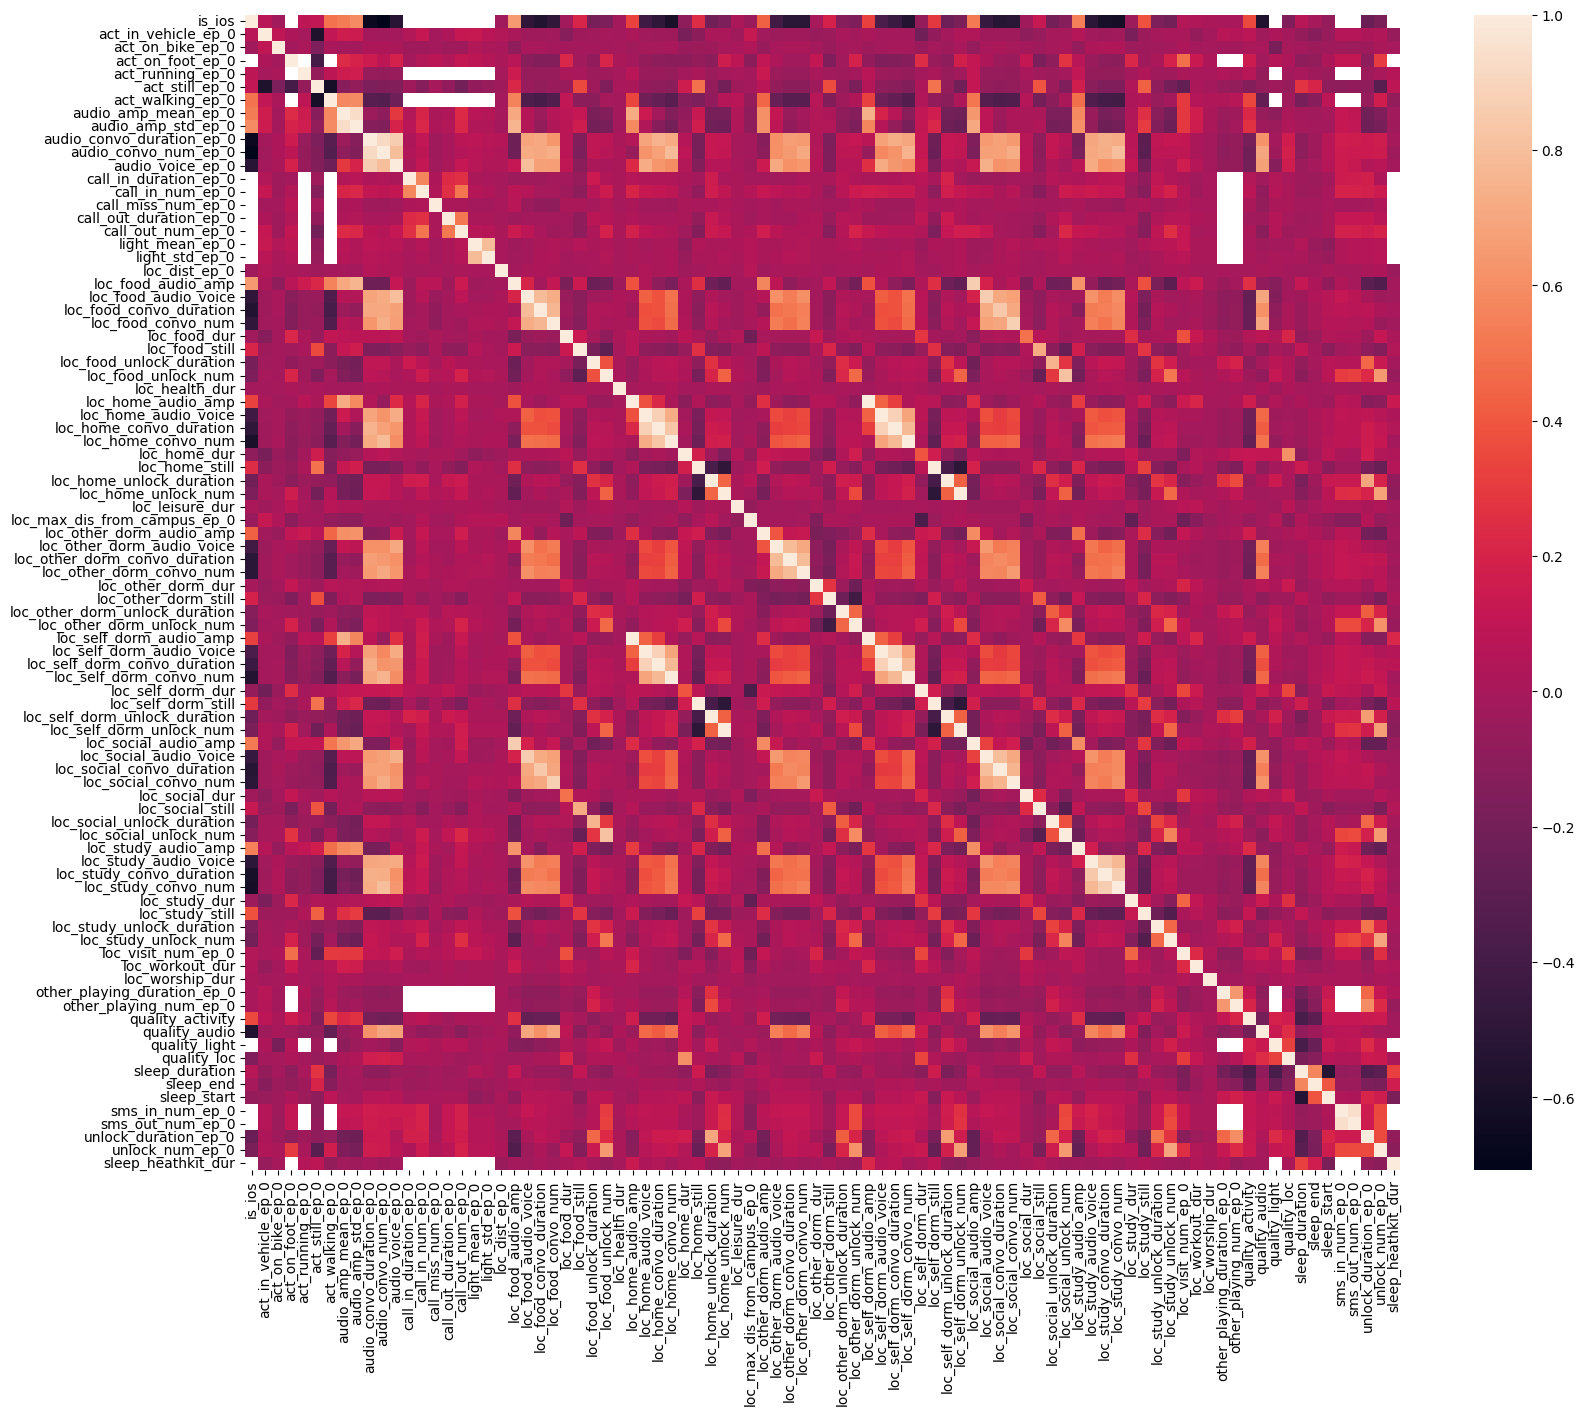

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(19, 15))
heatmap = sns.heatmap(
    sens_corr, 
    xticklabels=sens_corr.columns.values,
    yticklabels=sens_corr.columns.values,
    square=True,
    ax=ax
)

fig = heatmap.get_figure()
fig.savefig("sens_corr.png") 

# Merge

In [155]:
df_dem

df_ema_gen.merge(df_dem, on='uid', how='outer').head()
df_ema_cov.merge(df_dem, on='uid', how='outer').head()
df_steps.merge(df_dem, on='uid', how='outer').head()[['uid', 'step_ep_0', 'gender', 'race']]
df_sens.merge(df_dem, on='uid', how='outer').head()[['uid', 'is_ios', 'gender', 'race']]

uid  is_ios gender   race
0  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
1  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
2  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
3  1ff6d7f34acb354430e7323a35ff7703       1      F  asian
4  1ff6d7f34acb354430e7323a35ff7703       1      F  asian

In [156]:
day = '2020-10-01'

In [157]:
df_ema_gen_small = df_ema_gen.loc[df_ema_gen.day == day]
len(df_ema_gen_small)

170

In [158]:
df_ema_cov_small = df_ema_cov.loc[df_ema_cov.day == day]
len(df_ema_cov_small)

23

In [159]:
df_sens_small = df_sens_reduct.loc[df_sens_reduct.day == day]
len(df_sens_small)

169

In [160]:
df_steps_small = df_steps.loc[df_steps.day == day]
len(df_steps_small)

130

In [161]:
df_merge = df_sens_reduct.merge(df_dem, on=['uid'], how='outer')

In [162]:
len(df_merge)

216065

In [163]:
df_merge = df_merge.merge(df_ema_gen, on=['uid', 'day'], how='outer')

In [164]:
len(df_merge)

217163

In [165]:
df_merge = df_merge.merge(df_ema_cov, on=['uid', 'day'], how='outer')

In [166]:
len(df_merge)

217163

In [167]:
df_merge = df_merge.merge(df_steps, on=['uid', 'day'], how='outer')

In [168]:
len(df_merge)

224990

In [169]:
len(df_merge.columns)

147

In [170]:
df_merge.head()

uid  is_ios        day  act_in_vehicle_ep_0  \
0  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-07                  0.0   
1  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-08                  0.0   
2  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-09                110.0   
3  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-10                  0.0   
4  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-11                  0.0   

   act_on_bike_ep_0  act_on_foot_ep_0  act_running_ep_0  act_still_ep_0  \
0               0.0               NaN               7.0         72169.0   
1               0.0               NaN              13.0         79532.0   
2               0.0               NaN              25.0         79266.0   
3               0.0               NaN              31.0         71293.0   
4               0.0               NaN               5.0         79730.0   

   act_walking_ep_0  audio_amp_mean_ep_0  audio_amp_std_ep_0  \
0           14223.0         21642.433012        18109.879023   
1            6854.0          9689.311435        16125.699393   
2            6998.0         16072.048577        19590.010071   
3           15075.0         22904.328301        22872.541348   
4            6664.0          9477.581483        16504.654627   

   audio_convo_duration_ep_0  audio_convo_num_ep_0  audio_voice_ep_0  \
0                     4485.0                  10.0          0.297857   
1                     1600.0                   6.0          0.116832   
2                     5197.0                  14.0          0.225496   
3                     4129.0                   8.0          0.324706   
4                     1520.0                   7.0          0.078218   

   call_in_duration_ep_0  call_in_num_ep_0  call_miss_num_ep_0  \
0                    NaN               NaN                 NaN   
1                    NaN               NaN                 NaN   
2                    NaN               NaN                 NaN   
3                    NaN               NaN                 NaN   
4                    NaN               NaN                 NaN   

   call_out_duration_ep_0  call_out_num_ep_0  light_mean_ep_0  light_std_ep_0  \
0                     NaN                NaN              NaN             NaN   
1                     NaN                NaN              NaN             NaN   
2                     NaN                NaN              NaN             NaN   
3                     NaN                NaN              NaN             NaN   
4                     NaN                NaN              NaN             NaN   

   loc_dist_ep_0  loc_food_audio_amp  loc_food_audio_voice  \
0    5358.167217                 NaN                   NaN   
1    4197.640812                 NaN                   NaN   
2    4203.657376                 NaN                   NaN   
3    5710.003393                 NaN                   NaN   
4    3846.486372            14126.25              0.033333   

   loc_food_convo_duration  loc_food_convo_num  loc_food_dur  loc_food_still  \
0                      NaN                 NaN           NaN             NaN   
1                      NaN                 NaN           NaN             NaN   
2                      NaN                 NaN           NaN             NaN   
3                      NaN                 NaN           NaN             NaN   
4                      0.0                 0.0      1.166667       59.985714   

   loc_food_unlock_duration  loc_food_unlock_num  loc_health_dur  \
0                       NaN                  NaN             NaN   
1                       NaN                  NaN             NaN   
2                       NaN                  NaN             NaN   
3                       NaN                  NaN             NaN   
4                  0.002143             2.571429             0.0   

   loc_home_audio_amp  loc_home_audio_voice  loc_home_convo_duration  \
0                 NaN                   NaN                      NaN 

# Correlation

In [171]:
df_ema_gen_dict

Variable Feature Availability -- Android/iOS/All   \
0                  uid                                      All   
1                  day                                      All   
2                  pam                                      All   
3               phq4-1                                      All   
4               phq4-2                                      All   
5               phq4-3                                      All   
6               phq4-4                                      All   
7       phq4_resp_mean                                      All   
8     phq4_resp_median                                      All   
9           phq4_score                                      All   
10        social_level                                      All   
11              sse3-1                                      All   
12              sse3-2                                      All   
13              sse3-3                                      All   
14              sse3-4                                      All   
15      sse3_resp_mean                                      All   
16    sse3_resp_median                                      All   
17              stress                                      All   
18  avg_ema_spent_time                                      All   

                                                                                                                                                                                                    Description  \
0                                                                                                                                                                                                Unique user ID   
1                                                                                                                                                                                   Date in the format YYYYMMDD   
2   Photographic Affect Meter scores. The user chooses an image from 16 pictures. And the valence and arousal are calculated based on the rubric mentioned here: https://dl.acm.org/doi/10.1145/1978942.1979047   
3                                                                                        Over the last 2 weeks, how often have you been bothered by the following problems? Feeling nervous, anxious or on edge   
4                                                                                 Over the last 2 weeks, how often have you been bothered by the following problems? Not being able to stop or control worrying   
5                                                                                       Over the last 2 weeks, how often have you been bothered by the following problems? Feeling down, depressed or hopeless;   
6                                                                                Over the last 2 weeks, how often have you been bothered by the following problems? Little interest or pleasure in doing things   
7                                                                                                                                                                     Mean time spent on PHQ4 EMAs (in seconds)   
8                                                                                                                                                                   Median time spent on PHQ4 EMAs (in seconds)   
9                                                                                                                                                               Aggregated PHQ4 Score (Sum of PHQ4-1 to PHQ4-4)   
10                                                                                                                                                 Have you spent most of your time alone or with others today?   
11                                                                                                                                           

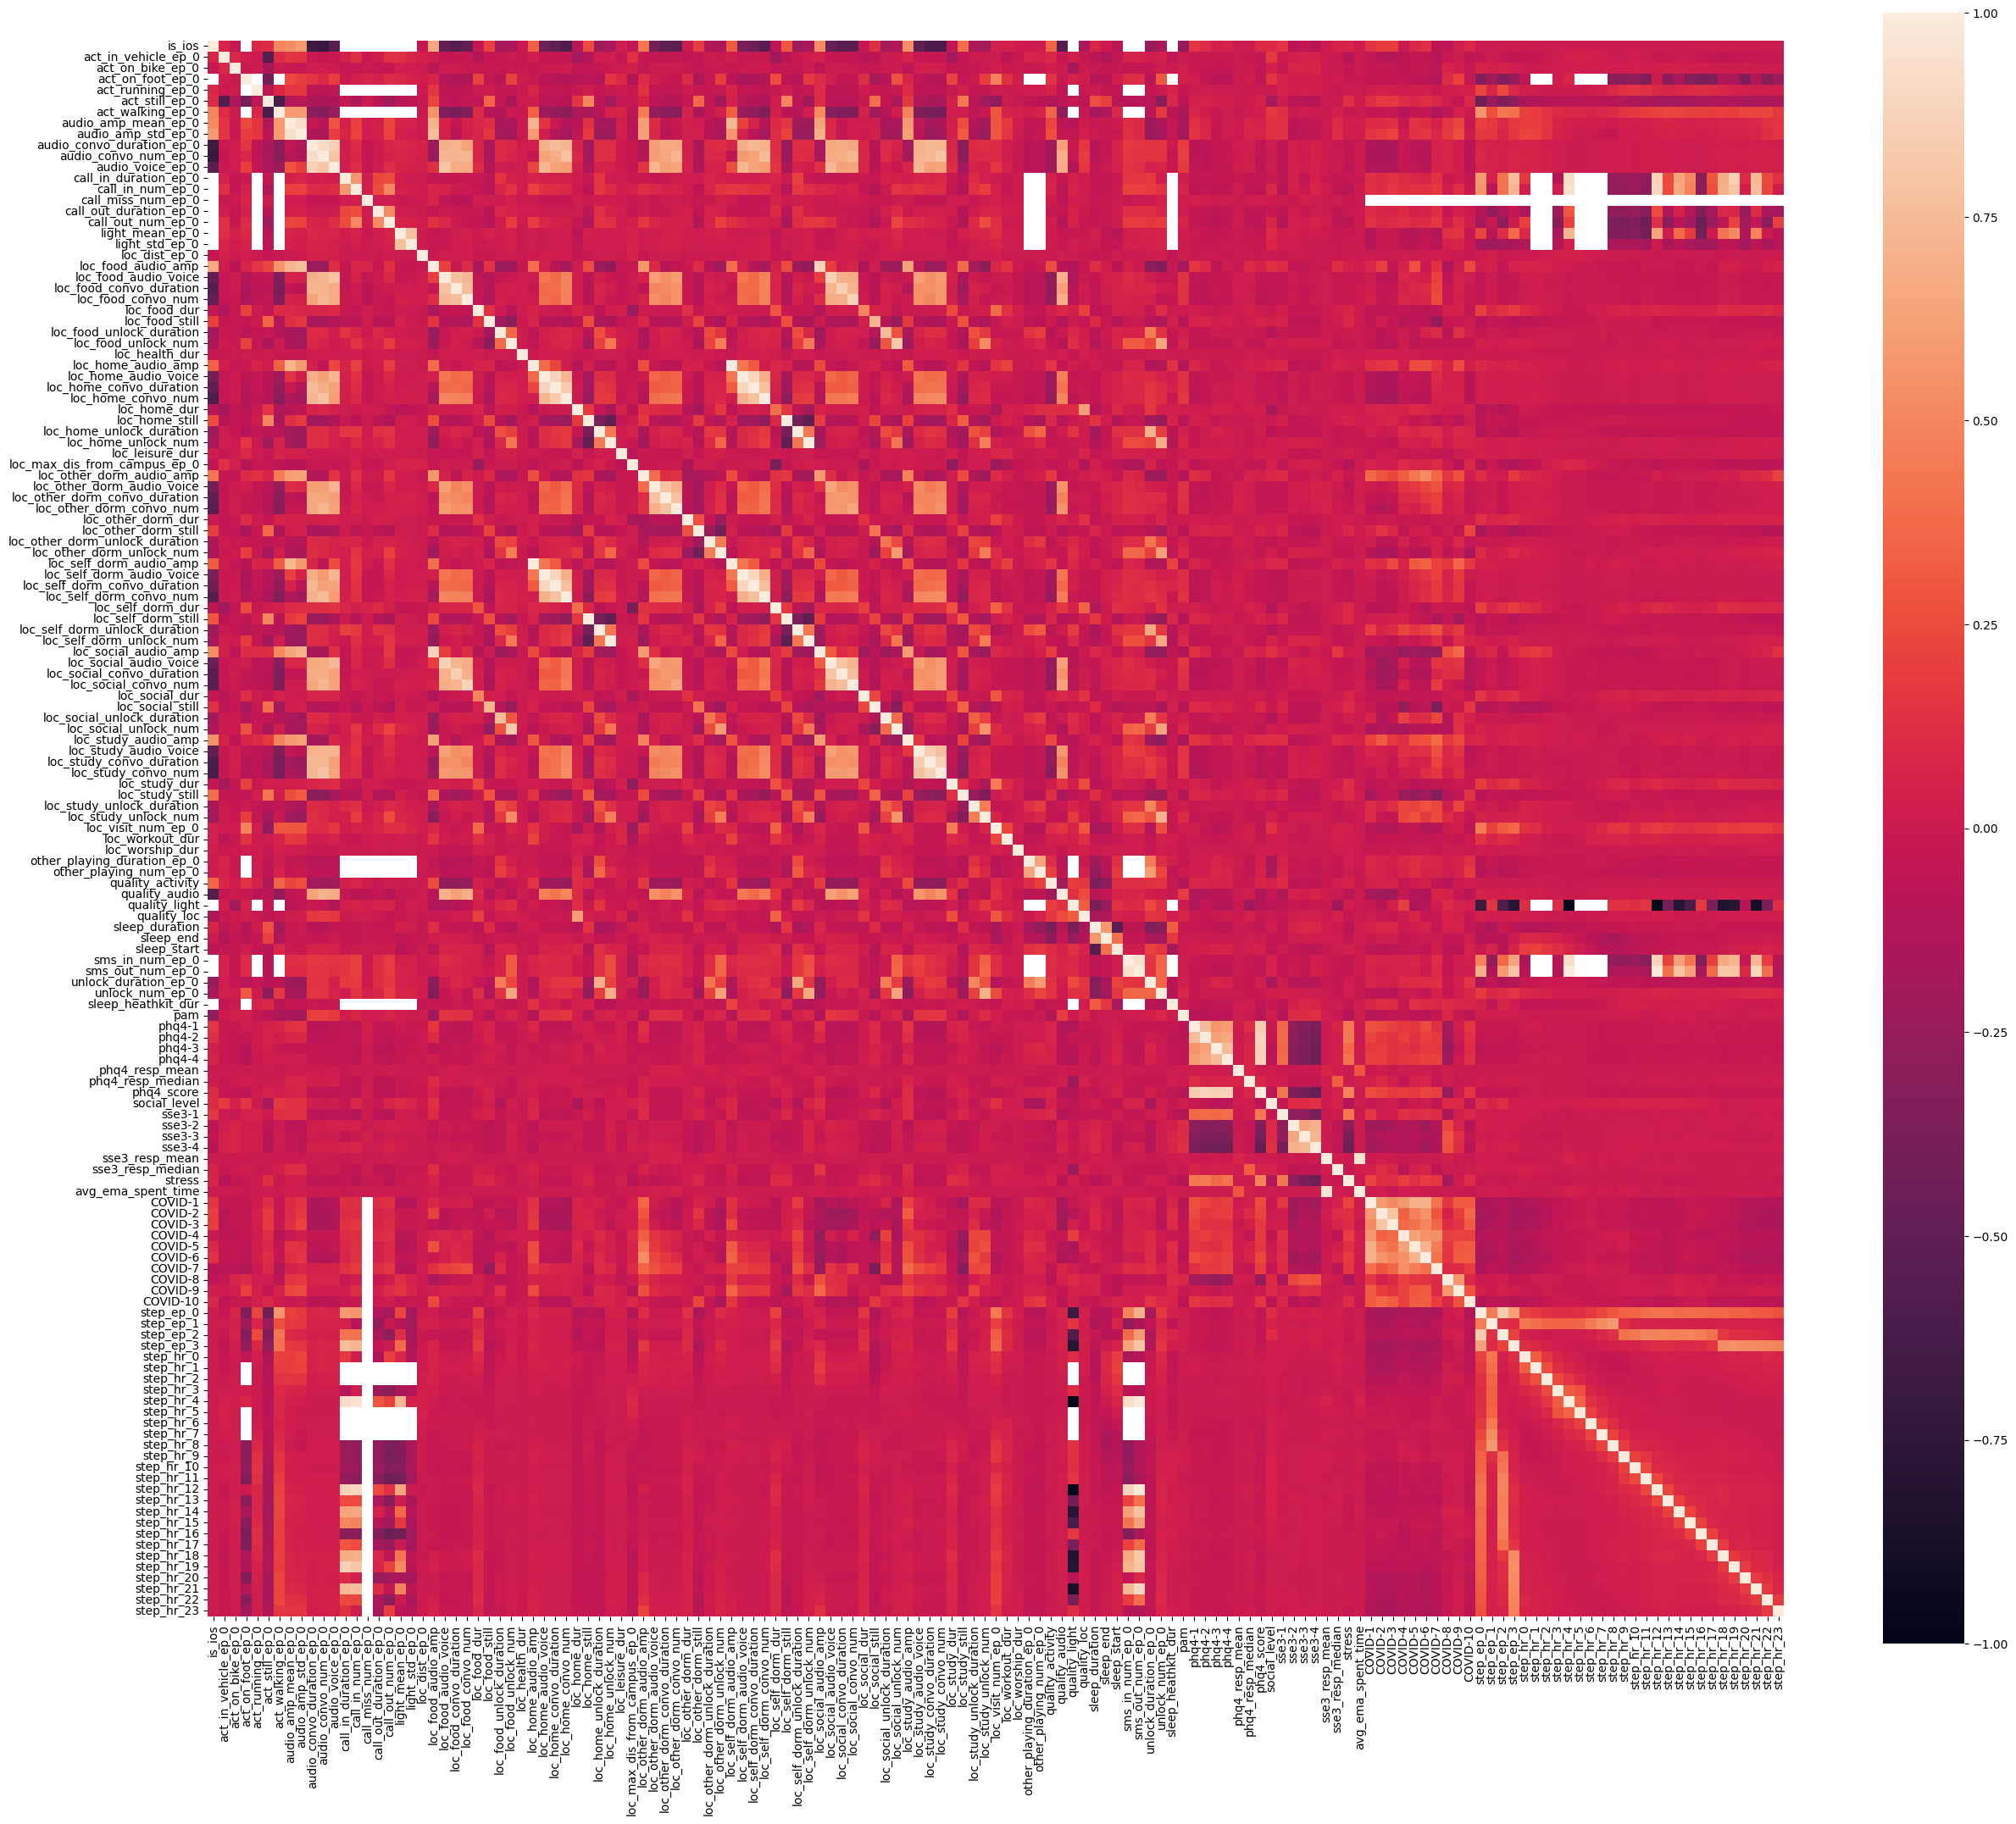

In [172]:
import seaborn as sns

merge_corr = df_merge.select_dtypes(['number']).corr()

f, ax = plt.subplots(figsize=(30, 25))
heatmap = sns.heatmap(
    merge_corr, 
    xticklabels=merge_corr.columns.values,
    yticklabels=merge_corr.columns.values,
    square=True,
    ax=ax
)

fig = heatmap.get_figure()
fig.savefig("merge_corr.png") 

In [173]:
# Correlation between stress and phq4_score
merge_corr.loc['stress', 'phq4_score']

0.4794963430777777

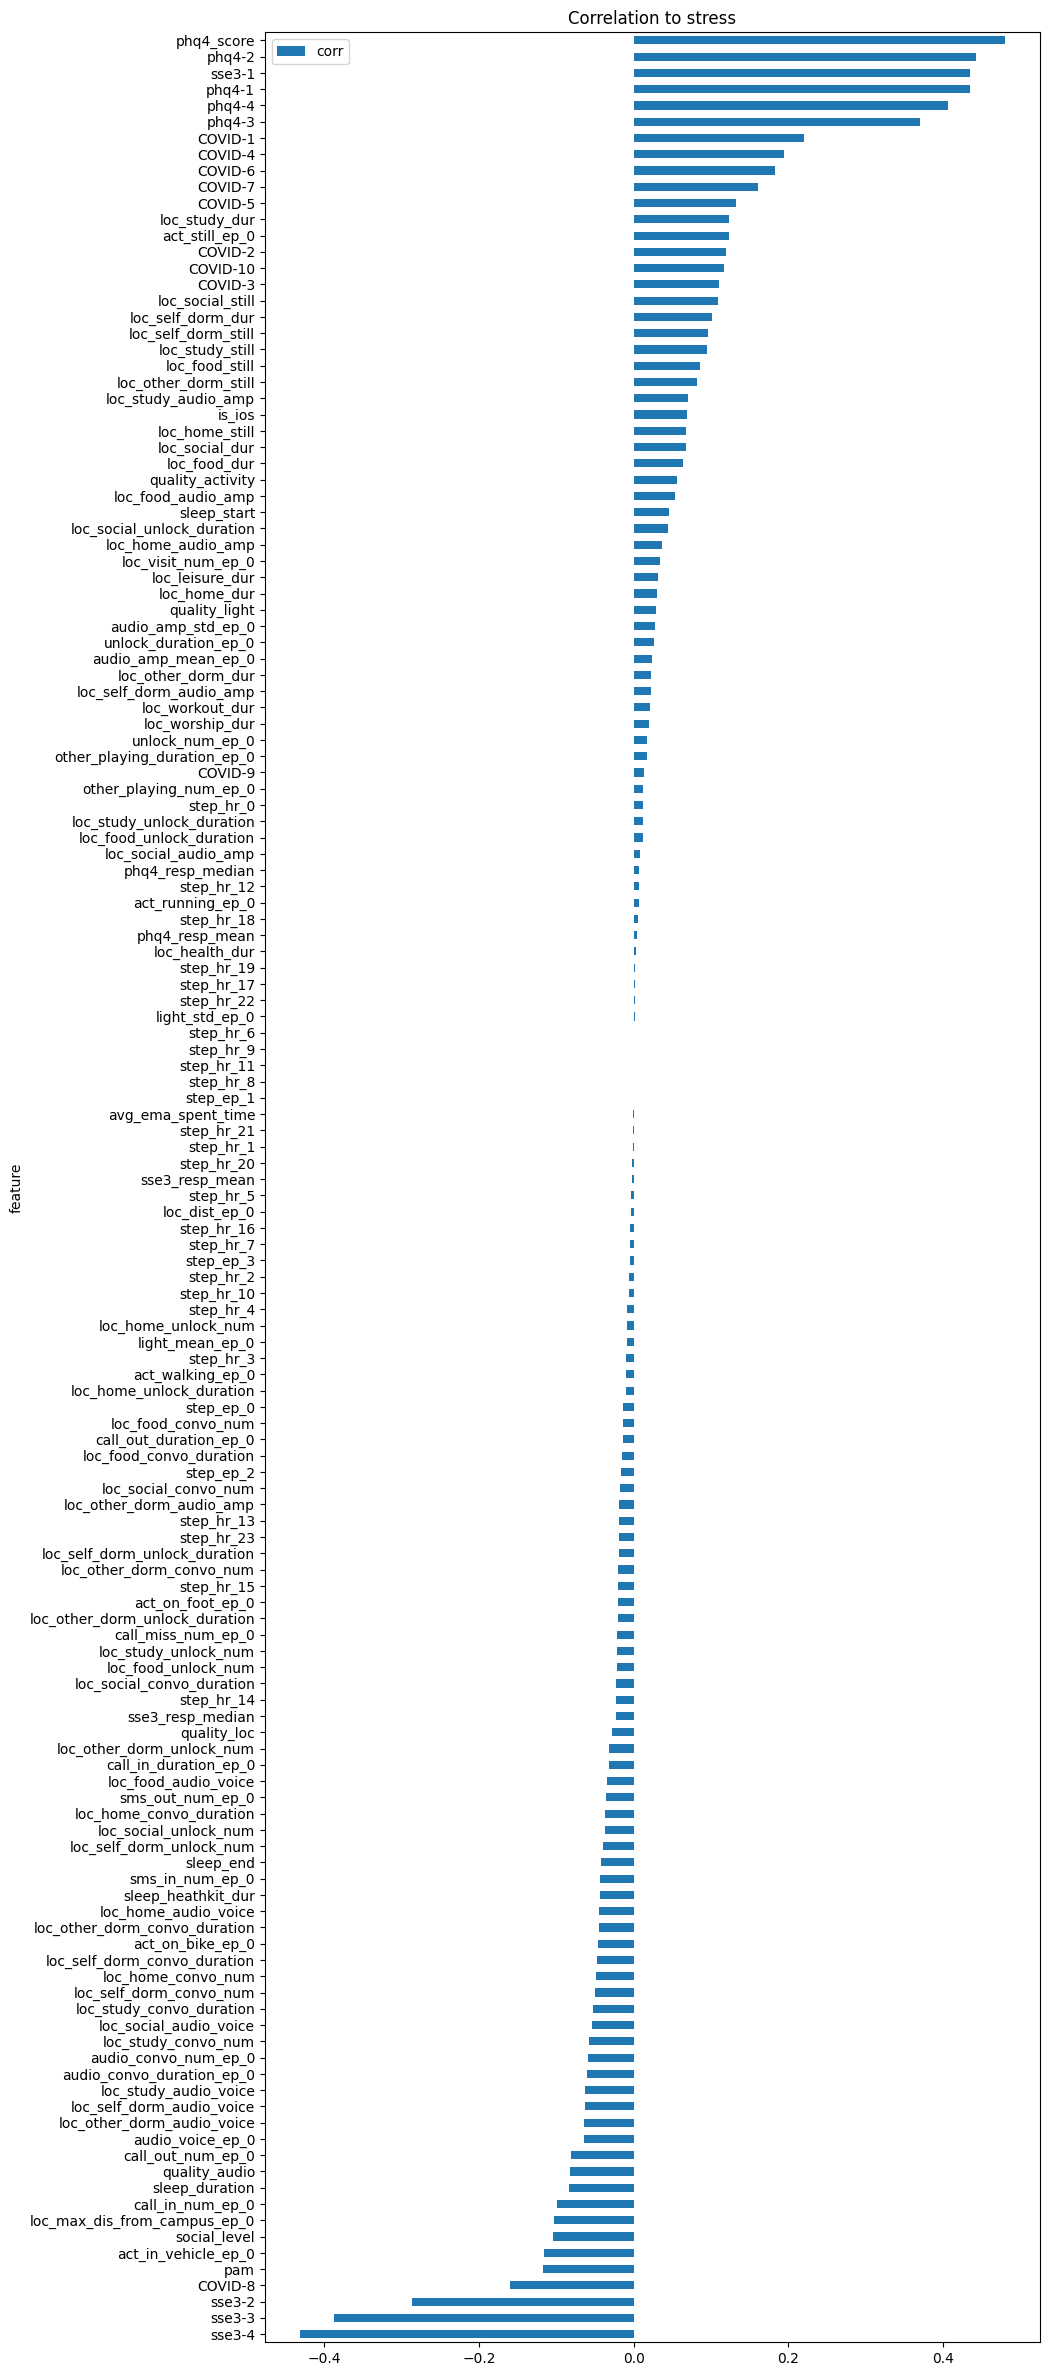

In [174]:
# Correlation between stress and all other features
corr_stress = merge_corr[['stress']]
corr_stress = corr_stress.reset_index().rename({"stress": "corr", "index": "feature"}, axis=1)
corr_stress = corr_stress.loc[corr_stress.feature != "stress"]

ax = corr_stress.sort_values(by='corr').plot.barh(x="feature", y="corr", title="Correlation to stress", figsize=(10,30))

fig = ax.get_figure()
fig.savefig('corr-stress.png')

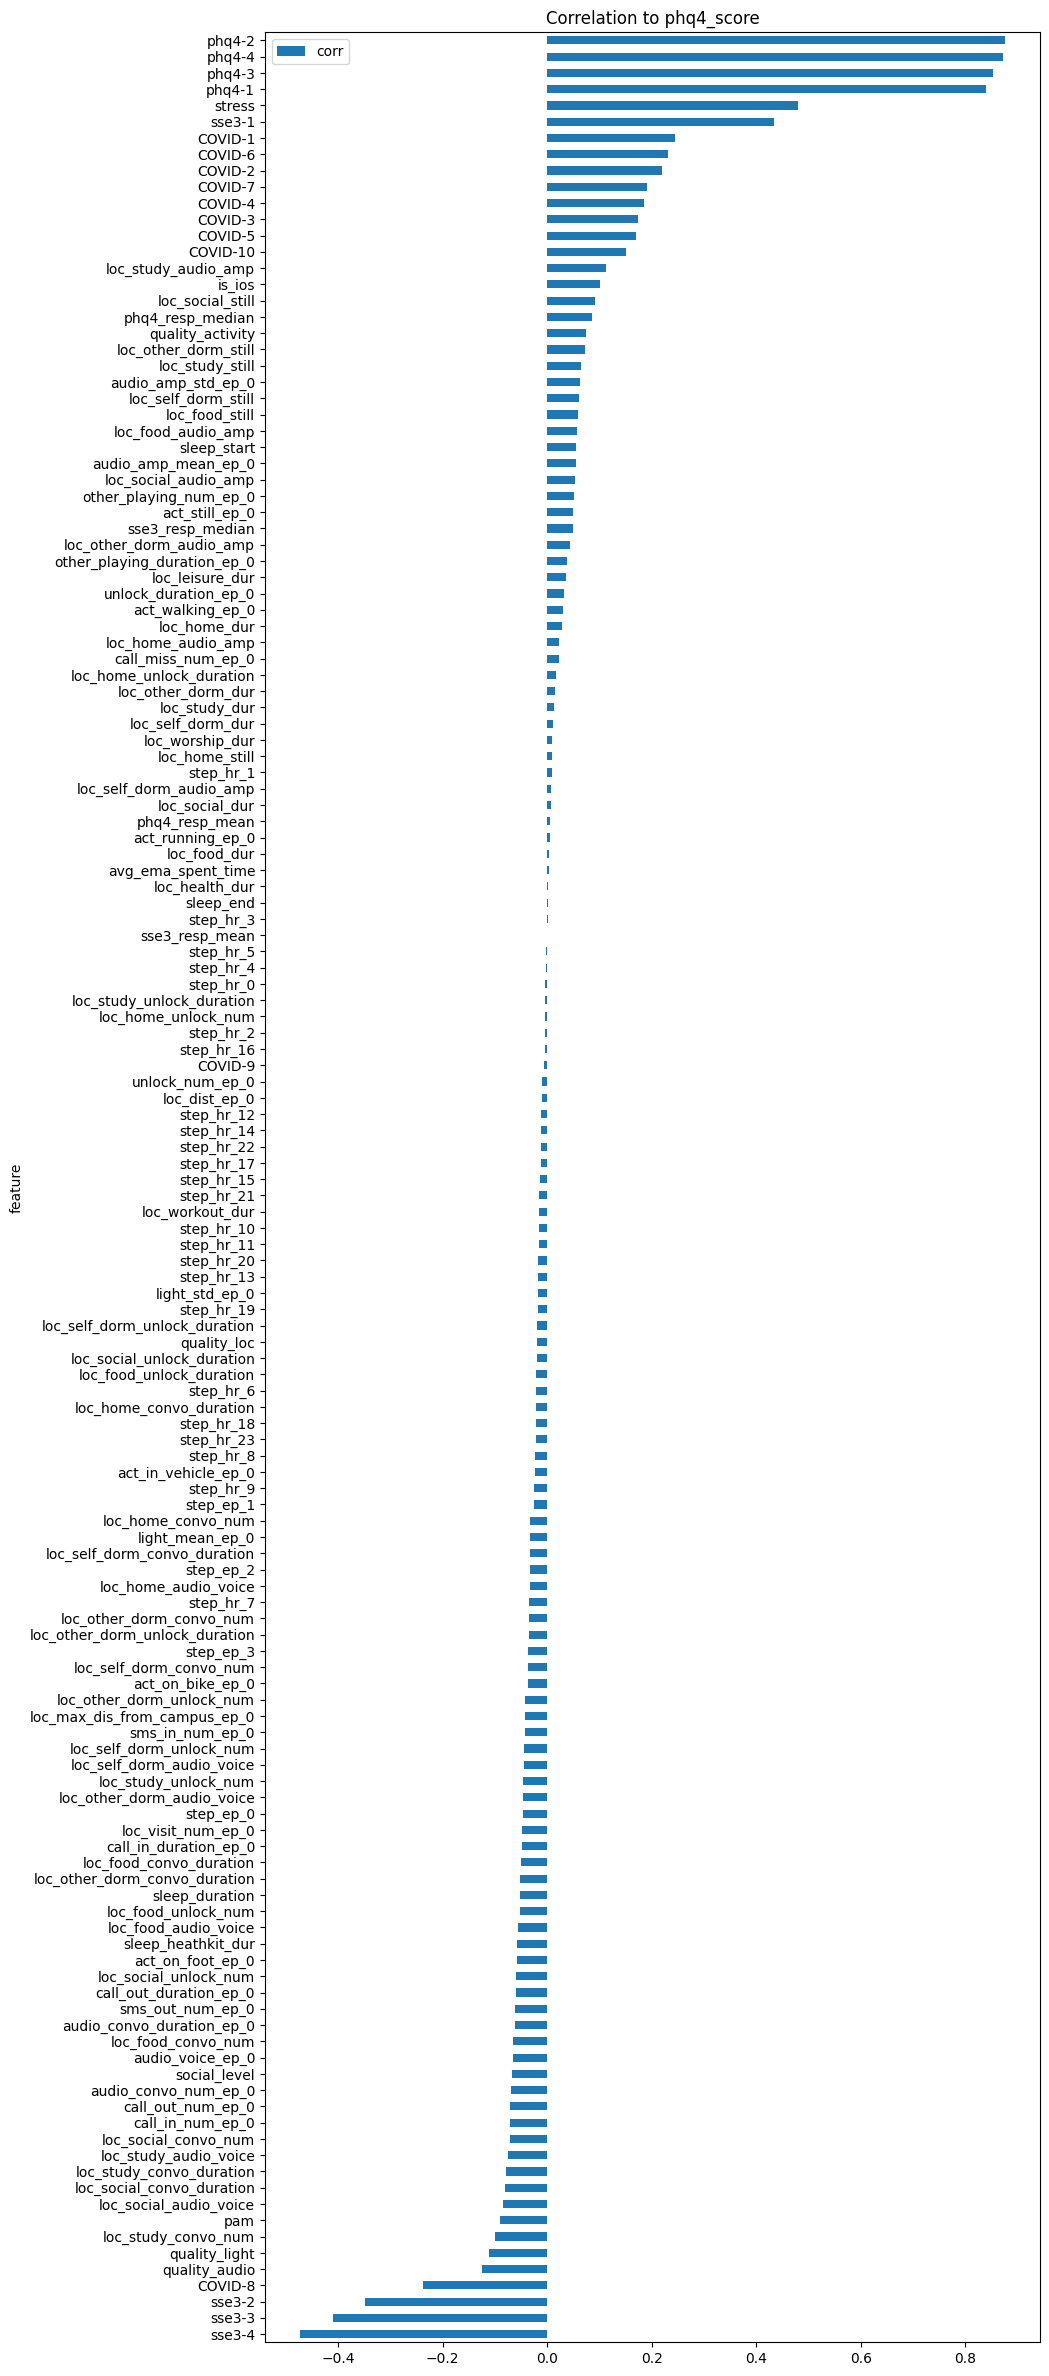

In [175]:
# Correlation between phq4_score and all other features
corr_stress = merge_corr[['phq4_score']]
corr_stress = corr_stress.reset_index().rename({"phq4_score": "corr", "index": "feature"}, axis=1)
corr_stress = corr_stress.loc[corr_stress.feature != "phq4_score"]

ax = corr_stress.sort_values(by='corr').plot.barh(x="feature", y="corr", title="Correlation to phq4_score", figsize=(10,30))

fig = ax.get_figure()
fig.savefig('corr-phq4_score.png')

# Profiling

In [698]:
# from ydata_profiling import ProfileReport

In [699]:
df_dem.shape

(216, 3)

In [700]:
# profile_dem = ProfileReport(df_dem, title="Profiling Report (Demographics)")
# profile_dem.to_file("profile-demographics.html")

In [701]:
df_ema_cov.shape

(16511, 12)

In [702]:
# profile_ema_cov = ProfileReport(df_ema_cov, title="Profiling Report (EMA COVID)")
# profile_ema_cov.to_file("profile-ema-covid.html")

In [703]:
df_ema_gen.shape

(217155, 19)

In [704]:
# profile_ema_gen = ProfileReport(df_ema_gen, title="Profiling Report (EMA General)")
# profile_ema_gen.to_file("profile-ema-general.html")

In [705]:
df_sens.shape

(216065, 653)

In [706]:
# # too many columns, takes forever
# profile_sens = ProfileReport(df_sens, title="Profiling Report (Sensing)")
# profile_sens.to_file("profile-sensing.html")

In [707]:
# profile_sens = ProfileReport(df_sens_reduct, title="Profiling Report (Sensing) (columns reducted)")
# profile_sens.to_file("profile-sensing-cols-reducted.html")

In [708]:
df_steps.shape

(176458, 30)

In [709]:
# %%time
# profile_steps = ProfileReport(df_steps, title="Profiling Report (Steps)")
# profile_steps.to_file("profile-steps.html")

# Demographics and OS

In [181]:
df_merge["uid"].nunique()

220

In [182]:
df_merge.shape

(224990, 147)

In [192]:
df_merge["is_ios"].value_counts()

is_ios
1.0    190960
0.0     25105
Name: count, dtype: int64

In [193]:
190960+ 25105

216065

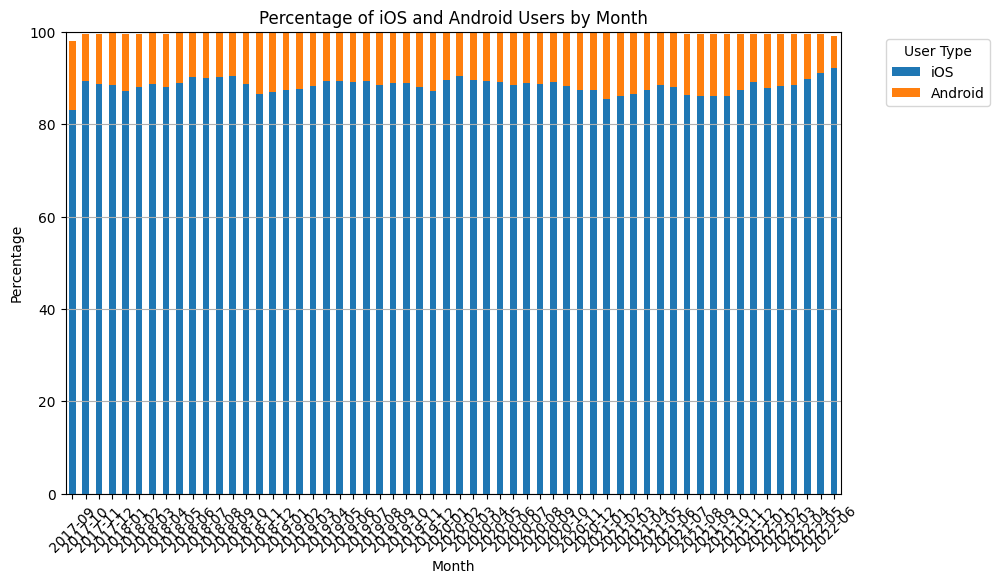

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merge is your DataFrame
# Ensure 'day' column is in datetime format
df_merge['day'] = pd.to_datetime(df_merge['day'])

# Extract the month from the 'day' column
df_merge['month'] = df_merge['day'].dt.to_period('M')

# Group by month and count the number of iOS and Android users
monthly_counts = df_merge.groupby(['month', 'is_ios']).size().unstack(fill_value=0)

# Calculate the percentage of iOS and Android users
monthly_counts['iOS'] = (monthly_counts[1] / monthly_counts.sum(axis=1)) * 100
monthly_counts['Android'] = (monthly_counts[0] / monthly_counts.sum(axis=1)) * 100

# Plot the stacked bar graph
monthly_counts[['iOS', 'Android']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Percentage of iOS and Android Users by Month')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.show()


      month  Android Users  iOS Users
0   2017-09              5         32
1   2017-10              8         70
2   2017-11             13         87
3   2017-12             12         87
4   2018-01             13         91
5   2018-02             13         89
6   2018-03             13         88
7   2018-04             13         86
8   2018-05             13         85
9   2018-06             11         83
10  2018-07             11         82
11  2018-08             10         80
12  2018-09             13        102
13  2018-10             24        149
14  2018-11             28        173
15  2018-12             28        170
16  2019-01             26        169
17  2019-02             26        167
18  2019-03             26        173
19  2019-04             24        172
20  2019-05             24        172
21  2019-06             23        170
22  2019-07             22        168
23  2019-08             24        165
24  2019-09             24        162
25  2019-10 

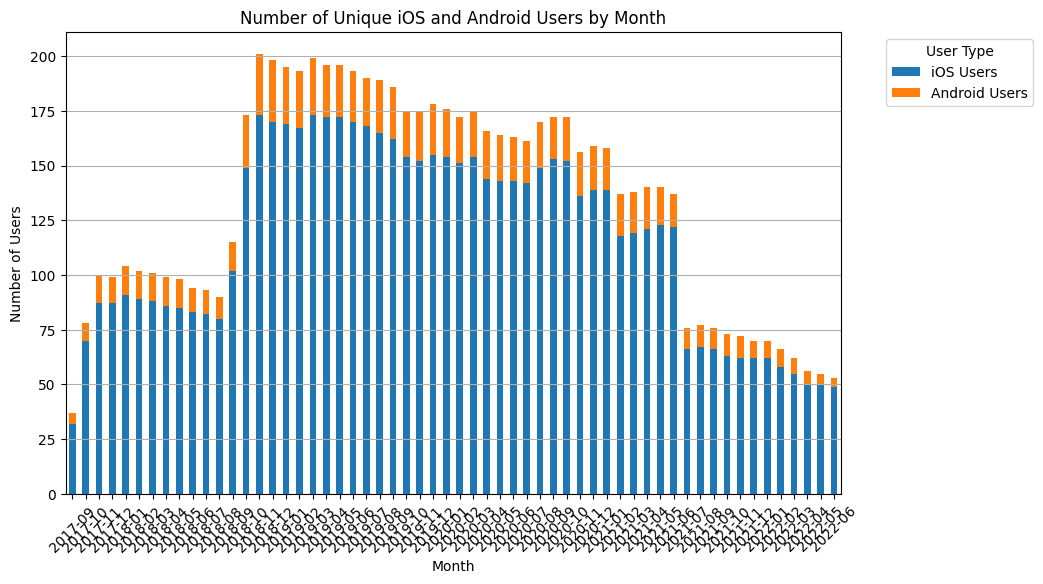

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_merge is your DataFrame
# Ensure 'day' column is in datetime format
df_merge['day'] = pd.to_datetime(df_merge['day'])

# Extract the month from the 'day' column
df_merge['month'] = df_merge['day'].dt.to_period('M')

# Group by month and is_ios to count unique users
unique_users = df_merge.groupby(['month', 'is_ios'])['uid'].nunique().unstack(fill_value=0)

# Rename columns for clarity
unique_users.columns = ['Android Users', 'iOS Users']

# Reset the index to turn the month from the index into a column
unique_users.reset_index(inplace=True)

# Convert month from Period to string for better readability
unique_users['month'] = unique_users['month'].astype(str)

# Display the resulting DataFrame
print(unique_users)

# Plotting the resulting DataFrame as a stacked bar chart
unique_users.set_index('month')[['iOS Users', 'Android Users']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Number of Unique iOS and Android Users by Month')
plt.xticks(rotation=45)
plt.legend(title='User Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

plt.show()


# Physical

In [84]:
def calculate_enroll_year(date):
    if date.month >= 9:
        return date.year
    else:
        return date.year - 1

In [85]:
def calculate_season(row):
    enroll_year = row['enroll_year']
    current_year = row['day_date'].year
    current_month = row['day_date'].month
    
    year_diff = current_year - enroll_year
    if (year_diff == 0 and 9 <= current_month <= 12) or (year_diff == 1) and (1 <= current_month <= 8):
        prefix = 'first'
    elif (year_diff == 1 and 9 <= current_month <= 12) or (year_diff == 2) and (1 <= current_month <= 8):
        prefix = 'second'
    elif (year_diff == 2 and 9 <= current_month <= 12) or (year_diff == 3) and (1 <= current_month <= 8):
        prefix = 'third'
    else:
        if 9 <= current_month <= 12:
            prefix = f'{year_diff + 1}th'
        else:
            prefix = f'{year_diff + 2}th'
    
    if current_month in [9, 10, 11]:
        season = 'fall'
    elif current_month in [12, 1, 2]:
        season = 'winter'
    elif current_month in [3, 4, 5]:
        season = 'spring'
    else:
        season = 'summer'
    
    return f'{prefix}_{season}'

In [200]:
df = df_merge.copy()

In [201]:
# convert day to month
df['day_date'] = pd.to_datetime(df['day'], format='%Y%m%d')
df['year_month'] = df['day_date'].dt.to_period('M')

In [202]:
df.head()

uid  is_ios        day  act_in_vehicle_ep_0  \
0  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-07                  0.0   
1  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-08                  0.0   
2  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-09                110.0   
3  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-10                  0.0   
4  1ff6d7f34acb354430e7323a35ff7703     1.0 2017-09-11                  0.0   

   act_on_bike_ep_0  act_on_foot_ep_0  act_running_ep_0  act_still_ep_0  \
0               0.0               NaN               7.0         72169.0   
1               0.0               NaN              13.0         79532.0   
2               0.0               NaN              25.0         79266.0   
3               0.0               NaN              31.0         71293.0   
4               0.0               NaN               5.0         79730.0   

   act_walking_ep_0  audio_amp_mean_ep_0  audio_amp_std_ep_0  \
0           14223.0         21642.433012        18109.879023   
1            6854.0          9689.311435        16125.699393   
2            6998.0         16072.048577        19590.010071   
3           15075.0         22904.328301        22872.541348   
4            6664.0          9477.581483        16504.654627   

   audio_convo_duration_ep_0  audio_convo_num_ep_0  audio_voice_ep_0  \
0                     4485.0                  10.0          0.297857   
1                     1600.0                   6.0          0.116832   
2                     5197.0                  14.0          0.225496   
3                     4129.0                   8.0          0.324706   
4                     1520.0                   7.0          0.078218   

   call_in_duration_ep_0  call_in_num_ep_0  call_miss_num_ep_0  \
0                    NaN               NaN                 NaN   
1                    NaN               NaN                 NaN   
2                    NaN               NaN                 NaN   
3                    NaN               NaN                 NaN   
4                    NaN               NaN                 NaN   

   call_out_duration_ep_0  call_out_num_ep_0  light_mean_ep_0  light_std_ep_0  \
0                     NaN                NaN              NaN             NaN   
1                     NaN                NaN              NaN             NaN   
2                     NaN                NaN              NaN             NaN   
3                     NaN                NaN              NaN             NaN   
4                     NaN                NaN              NaN             NaN   

   loc_dist_ep_0  loc_food_audio_amp  loc_food_audio_voice  \
0    5358.167217                 NaN                   NaN   
1    4197.640812                 NaN                   NaN   
2    4203.657376                 NaN                   NaN   
3    5710.003393                 NaN                   NaN   
4    3846.486372            14126.25              0.033333   

   loc_food_convo_duration  loc_food_convo_num  loc_food_dur  loc_food_still  \
0                      NaN                 NaN           NaN             NaN   
1                      NaN                 NaN           NaN             NaN   
2                      NaN                 NaN           NaN             NaN   
3                      NaN                 NaN           NaN             NaN   
4                      0.0                 0.0      1.166667       59.985714   

   loc_food_unlock_duration  loc_food_unlock_num  loc_health_dur  \
0                       NaN                  NaN             NaN   
1                       NaN                  NaN             NaN   
2                       NaN                  NaN             NaN   
3                       NaN                  NaN             NaN   
4                  0.002143             2.571429             0.0   

   loc_home_audio_amp  loc_home_audio_voice  loc_home_convo_duration  \
0                 NaN                   NaN                      NaN 

In [203]:
# first day for each user
first_day = df.groupby('uid')['day_date'].min().reset_index()
first_day.columns = ['uid', 'first_day']
first_day['enroll_year'] = first_day['first_day'].apply(calculate_enroll_year)
first_day.enroll_year.unique()

array([2017, 2018])

In [204]:
# join main df with first day df
df = df.merge(first_day, on="uid")

In [205]:
# add seasons (first_sprint, second_summer, etc.)
df['season'] = df.apply(calculate_season, axis=1)

In [206]:
df[['uid', 'day', 'day_date', 'enroll_year', 'season']].sample(10)

uid        day   day_date  enroll_year  \
137823  20b8c420e5a7abcb07f11aab23e42923 2019-05-24 2019-05-24         2018   
160825  964412e1937376da4b5a70412a600bc9 2020-04-23 2020-04-23         2018   
89584   107c06248d28377b345ae06e5bda10c1 2020-07-07 2020-07-07         2017   
41759   34ed21e64b190dc037d35ef7f646feb8 2018-06-28 2018-06-28         2017   
53521   13789d5f8a59f1e347e42b99233530d6 2019-09-11 2019-09-11         2017   
112712  83e4705b8ead02d2659f4d4241183e17 2020-03-14 2020-03-14         2018   
44634   f0db9e3e8b9b5080e5752383cceb34f6 2018-10-24 2018-10-24         2017   
104549  63e8142ef2fdd89aec0630ce6070831d 2021-04-03 2021-04-03         2017   
44197   45555d3305e255895b11695c179a98cd 2021-04-03 2021-04-03         2017   
174706  ffc4b142e017c162ed4db7b05414fc4b 2021-08-09 2021-08-09         2018   

               season  
137823   first_spring  
160825  second_spring  
89584    third_summer  
41759    first_summer  
53521      third_fall  
112712  second_spring  
44634     second_fall  
104549     6th_spring  
44197      6th_spring  
174706   third_summer

In [207]:
df.loc[df.season == 'first_spring'][['uid', 'day', 'day_date', 'enroll_year', 'season']].head()

uid        day   day_date  enroll_year  \
175  1ff6d7f34acb354430e7323a35ff7703 2018-03-01 2018-03-01         2017   
176  1ff6d7f34acb354430e7323a35ff7703 2018-03-02 2018-03-02         2017   
177  1ff6d7f34acb354430e7323a35ff7703 2018-03-03 2018-03-03         2017   
178  1ff6d7f34acb354430e7323a35ff7703 2018-03-04 2018-03-04         2017   
179  1ff6d7f34acb354430e7323a35ff7703 2018-03-05 2018-03-05         2017   

           season  
175  first_spring  
176  first_spring  
177  first_spring  
178  first_spring  
179  first_spring

In [208]:
# studying time
df['studying_time'] = df.loc_study_still + df.loc_study_dur

In [209]:
# inside the house time
df['inside_house_time'] = df.loc_home_dur

In [210]:
# # outside the house time
# df['outside_house_time'] = df.loc_home_dur

In [211]:
# doing sport
df['doing_sport'] = df.loc_workout_dur

In [212]:
# average daily exercises
android_col = 'act_on_foot_ep_0'
ios_col = 'act_running_ep_0_plus_act_walking_ep_0'
df[ios_col] = df.act_running_ep_0 + df.act_walking_ep_0

In [213]:
# split by OS
df_ios = df.loc[df.is_ios == 1].copy()
df_android = df.loc[df.is_ios == 0].copy()

In [214]:
len(df_ios), len(df_android)

(190960, 25105)

In [221]:
def create_boxplot_per_month(df, col, title_suffix=''):
    df.boxplot(column=col, by='year_month', grid=False, figsize=(20, 6))
    plt.title(f'Monthly Box Plot of Column {col} {title_suffix}')
    plt.suptitle('')
    plt.xlabel('Date')
    plt.ylabel('Value of Column')

    xtick_labels = df['year_month'].unique()
    plt.xticks(range(0, len(xtick_labels), 2), xtick_labels[::2], rotation=45)

    plt.show()

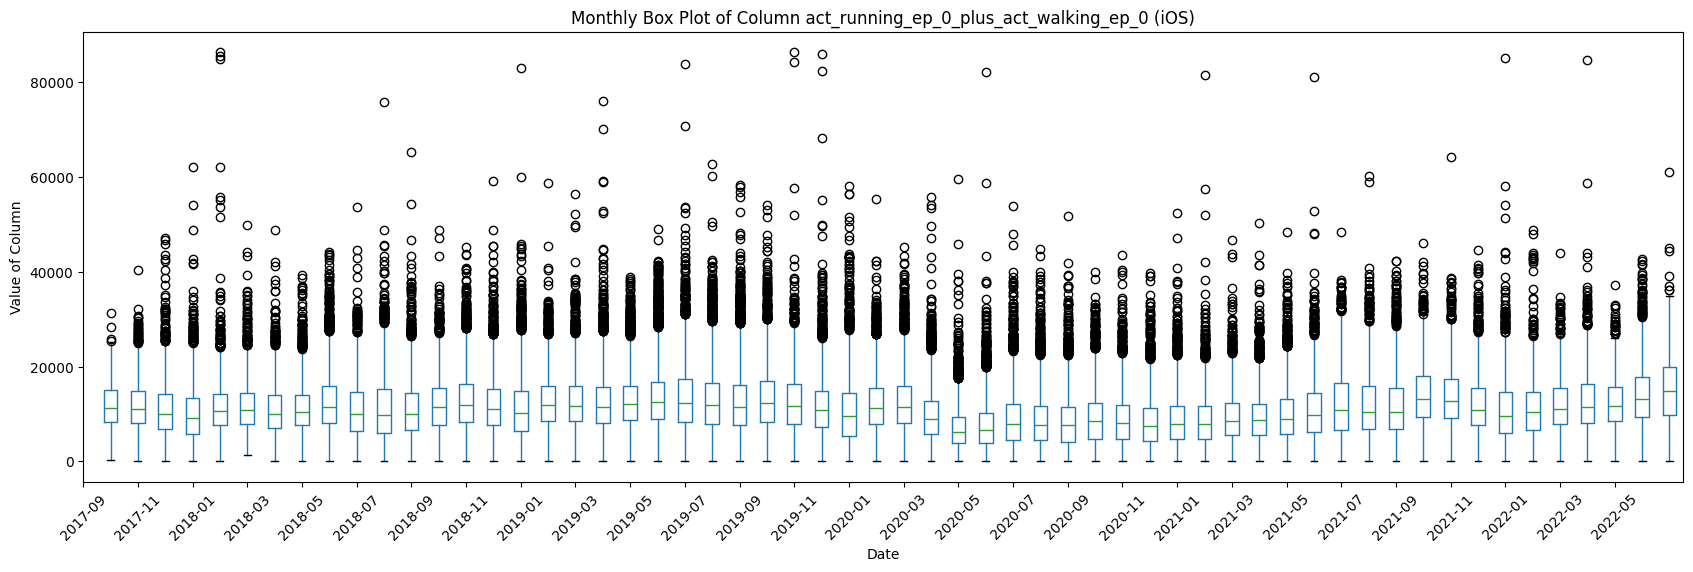

In [222]:
create_boxplot_per_month(df_ios, ios_col, "(iOS)")

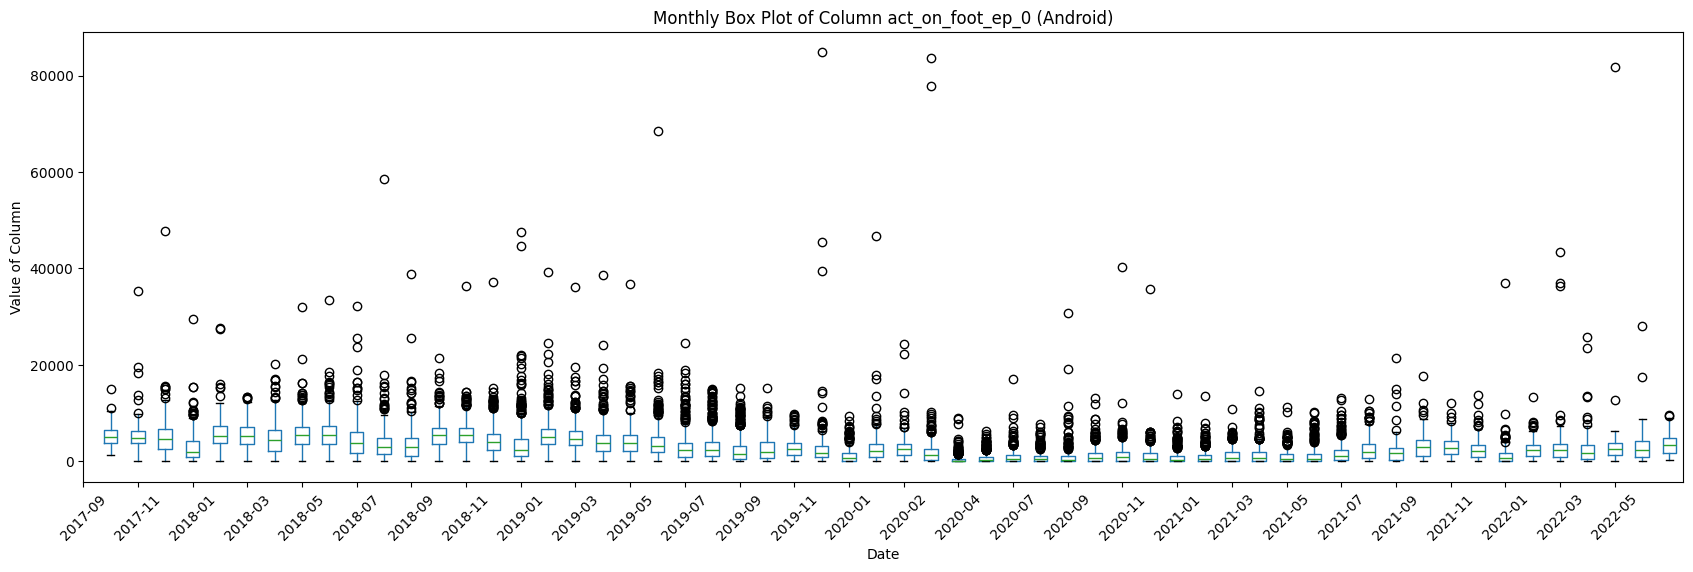

In [223]:
create_boxplot_per_month(df_android, android_col, "(Android)")

In [789]:
df_covid = df.loc[df.season.isin([
    'first_spring',
    'first_summer',
    'second_fall',
    'second_winter',
    'second_spring',
    'second_summer',
    'third_fall',
    'third_winter',
])].copy()

In [790]:
len(df_covid)

128096

In [791]:
df_covid.season.value_counts()

season
first_spring     17995
first_summer     17029
second_fall      17002
second_spring    15881
second_summer    15864
second_winter    15857
third_fall       14911
third_winter     13557
Name: count, dtype: int64

In [792]:
# split by OS
df_covid_ios = df_covid.loc[df_covid.is_ios == 1].copy()
df_covid_android = df_covid.loc[df_covid.is_ios == 0].copy()

In [793]:
len(df_covid_ios), len(df_covid_android)

(109657, 13959)

In [794]:
season_order = [
    'first_spring', 'first_summer', 
    'second_fall', 'second_winter', 'second_spring', 'second_summer',
    'third_fall', 'third_winter',
]

In [795]:
def create_boxplot_comparison_per_season(df, col, title_suffix=''):

    df_2017_enroll = df.loc[df.enroll_year == 2017]
    df_2018_enroll = df.loc[df.enroll_year == 2018]

    plt.figure(figsize=(20, 6))
    
    positions1 = range(len(season_order))
    positions1 = [p - 0.2 for p in positions1]
    bp1 = plt.boxplot(
        [df_2017_enroll[df_2017_enroll['season'] == season][col] for season in season_order],
        positions=positions1,
        patch_artist=True,
        boxprops=dict(color="red", facecolor="white"),  # control
        widths=0.4
    )

    # positions2 = positions1  # draw 2018 plots over 2017 plots
    positions2 = [p + 0.4 for p in positions1]  # draw 2018 next to 2017 plots
    bp2 = plt.boxplot(
        [df_2018_enroll[df_2018_enroll['season'] == season][col] for season in season_order],
        positions=positions2,
        patch_artist=True,
        boxprops=dict(color="blue", facecolor="white"),  # treatment
        widths=0.4
    )

    plt.title(f'Seasonal Box Plot of Column {col} {title_suffix}')
    plt.suptitle('')
    plt.xlabel('Date')
    plt.ylabel('Value of Column')

    xtick_labels = df['season'].unique()
    plt.xticks(range(len(xtick_labels)), xtick_labels)

    plt.axvline(x=3.5, color='black', linestyle='dotted')

    plt.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Control', 'Treatment'], loc='upper right')

    plt.show()

In [806]:
def create_plot_comparison_per_season(df, col, title_suffix=''):

    df_2017_enroll = df.loc[df.enroll_year == 2017]
    df_2018_enroll = df.loc[df.enroll_year == 2018]

    df_2017_enroll_agg = df_2017_enroll.groupby(['enroll_year', 'season']).agg({col: "mean"}).reset_index()
    df_2018_enroll_agg = df_2018_enroll.groupby(['enroll_year', 'season']).agg({col: "mean"}).reset_index()
    
    plt.figure(figsize=(10, 6))

    line1, = plt.plot(
        season_order,
        [df_2017_enroll_agg[df_2017_enroll_agg['season'] == season][col] for season in season_order],
        color='red'
    )
    line2, = plt.plot(
        season_order,
        [df_2018_enroll_agg[df_2018_enroll_agg['season'] == season][col] for season in season_order],
        color='blue'
    )

    plt.title(f'Monthly Plot of Column {col} {title_suffix}')
    plt.suptitle('')
    plt.xlabel('Date')
    plt.ylabel('Value of Column')

    xtick_labels = df['season'].unique()
    plt.xticks(range(len(xtick_labels)), xtick_labels)

    plt.axvline(x=3.5, color='black', linestyle='dotted')

    plt.legend([line1, line2], ['Control', 'Treatment'], loc='upper right')

    plt.show()

## average daily excersice

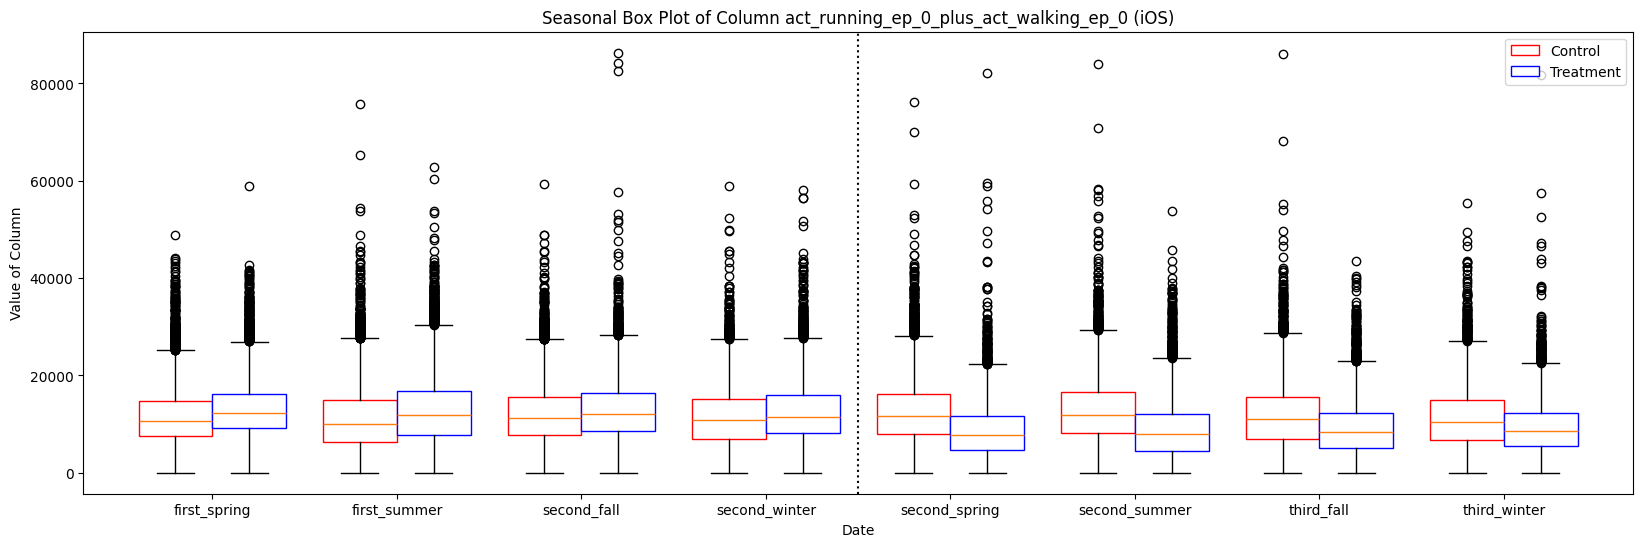

In [807]:
create_boxplot_comparison_per_season(df_covid_ios, ios_col, '(iOS)')

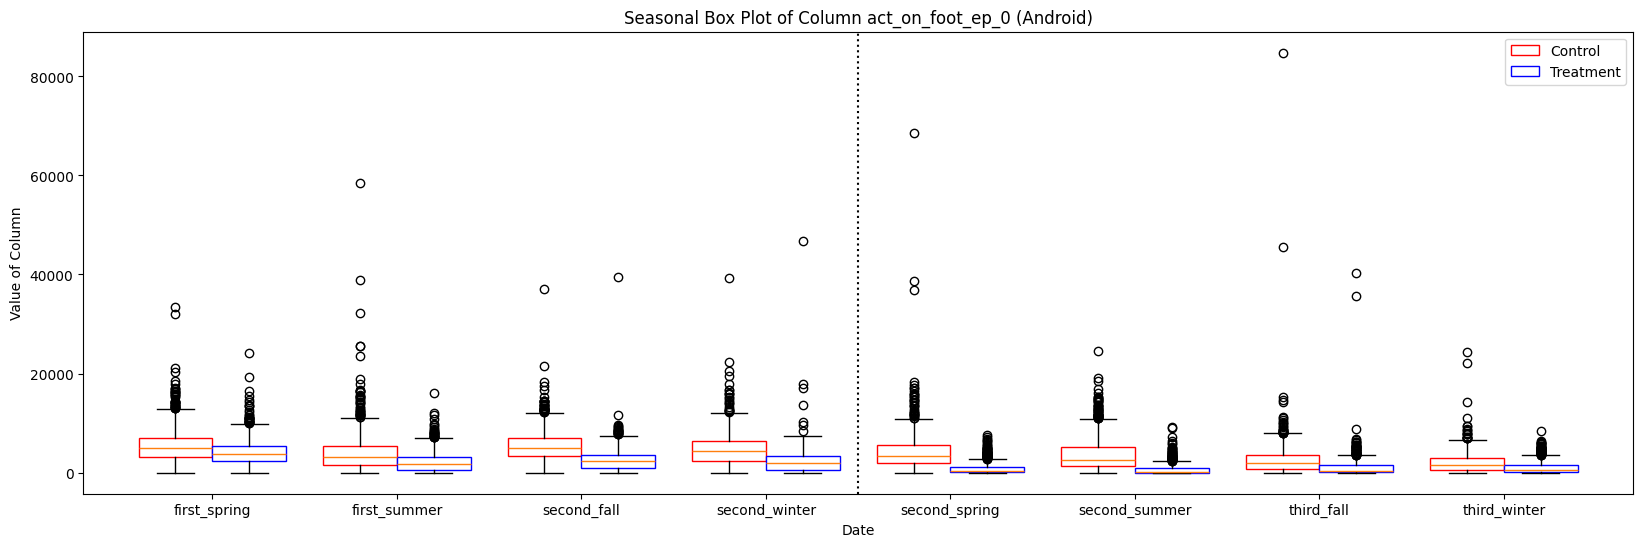

In [808]:
create_boxplot_comparison_per_season(df_covid_android, android_col, '(Android)')

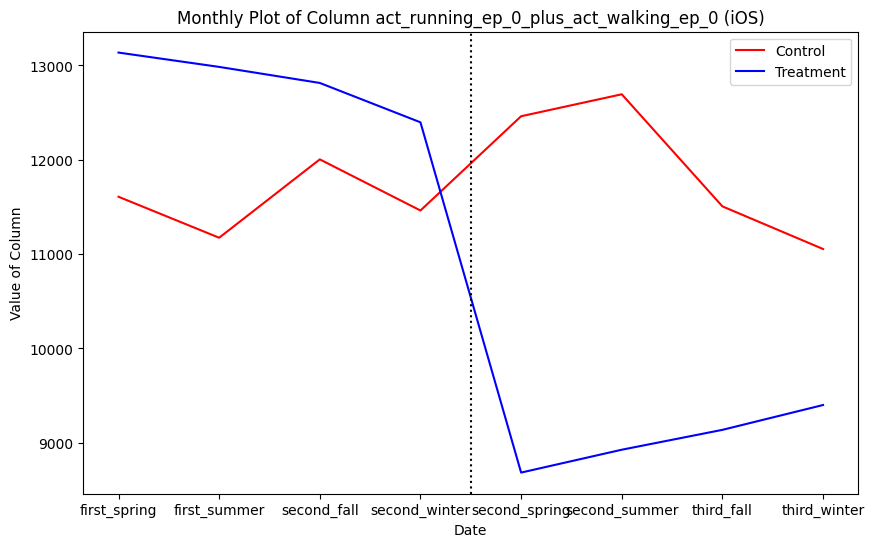

In [809]:
create_plot_comparison_per_season(df_covid_ios, ios_col, '(iOS)')

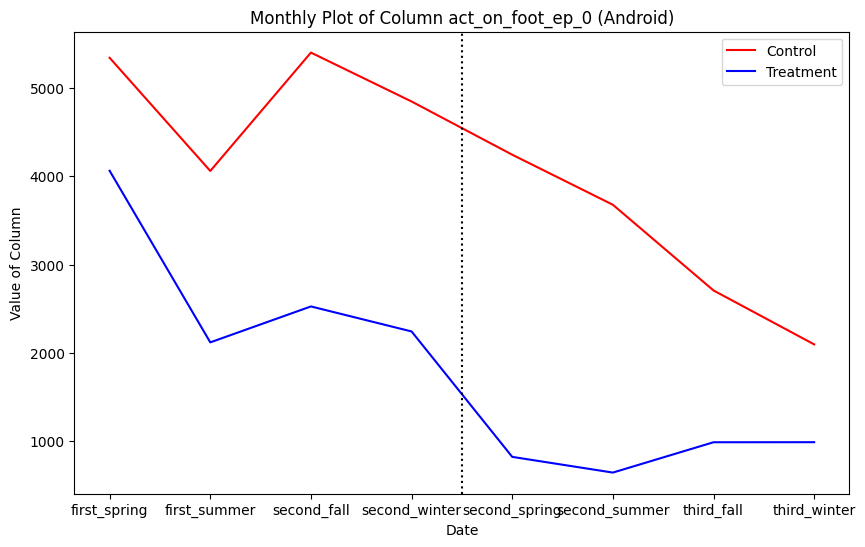

In [810]:
create_plot_comparison_per_season(df_covid_android, android_col, '(Android)')

## studying time

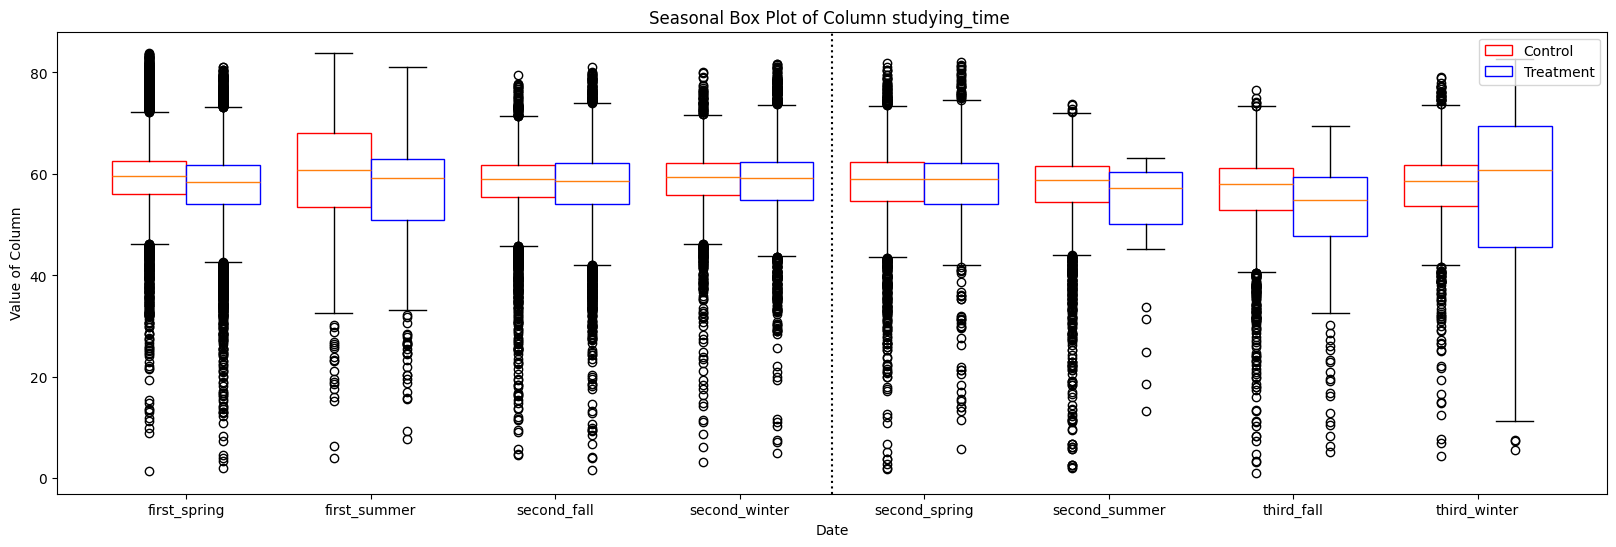

In [811]:
create_boxplot_comparison_per_season(df_covid.dropna(subset=['studying_time']), 'studying_time')

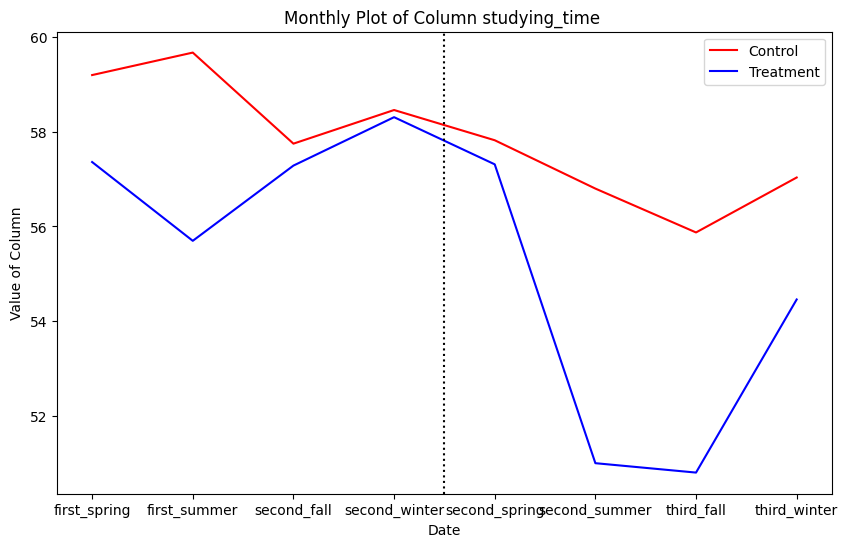

In [812]:
create_plot_comparison_per_season(df_covid, 'studying_time')

## inside the house time

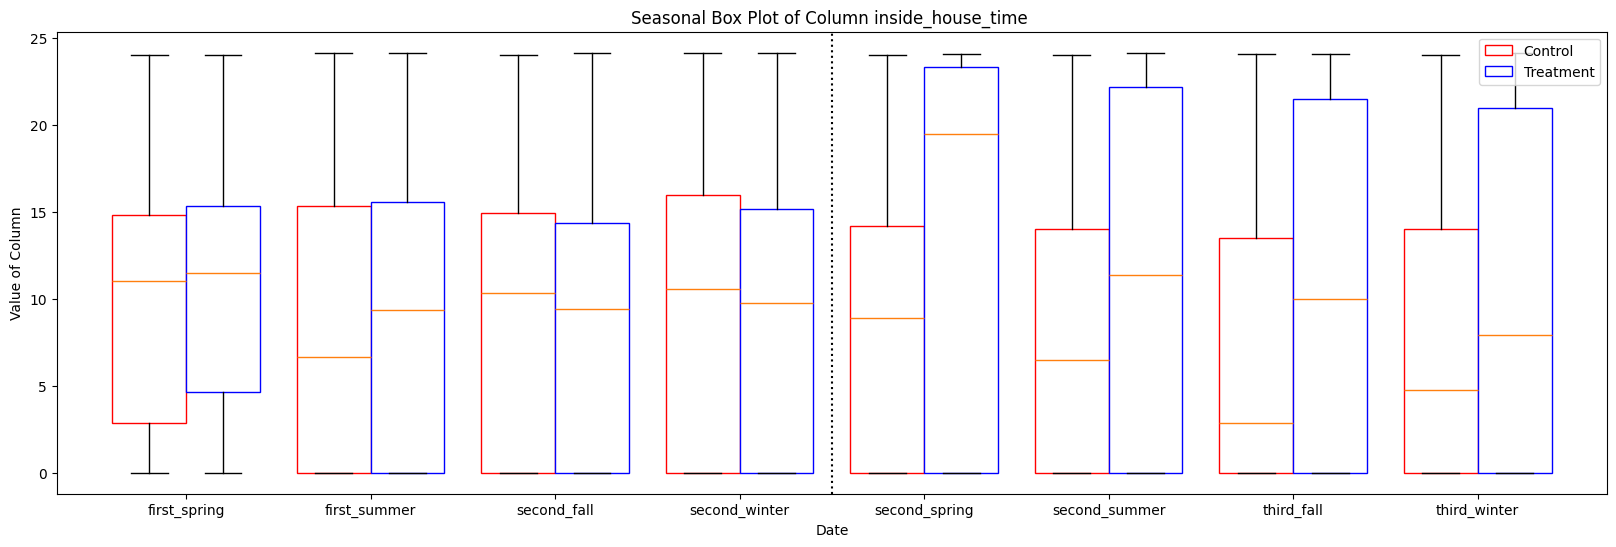

In [813]:
create_boxplot_comparison_per_season(df_covid.dropna(subset=['inside_house_time']), 'inside_house_time')

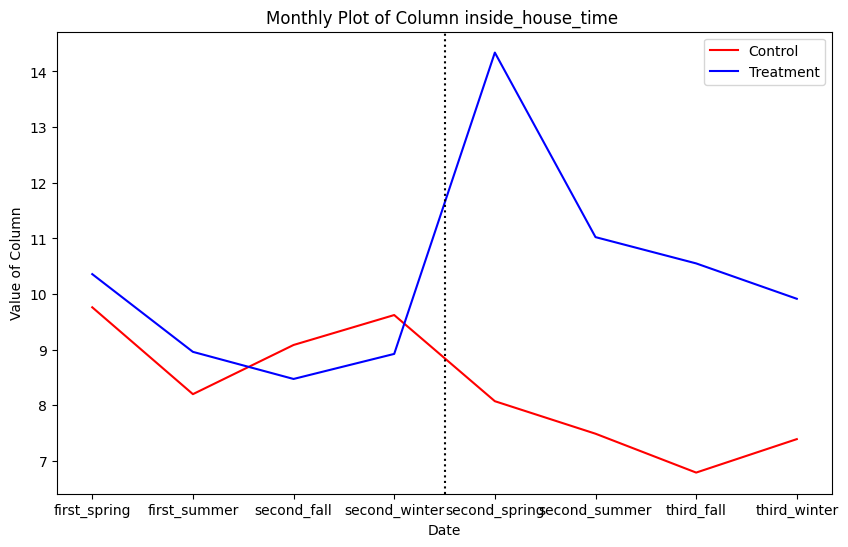

In [814]:
create_plot_comparison_per_season(df_covid, 'inside_house_time')

## doing sport

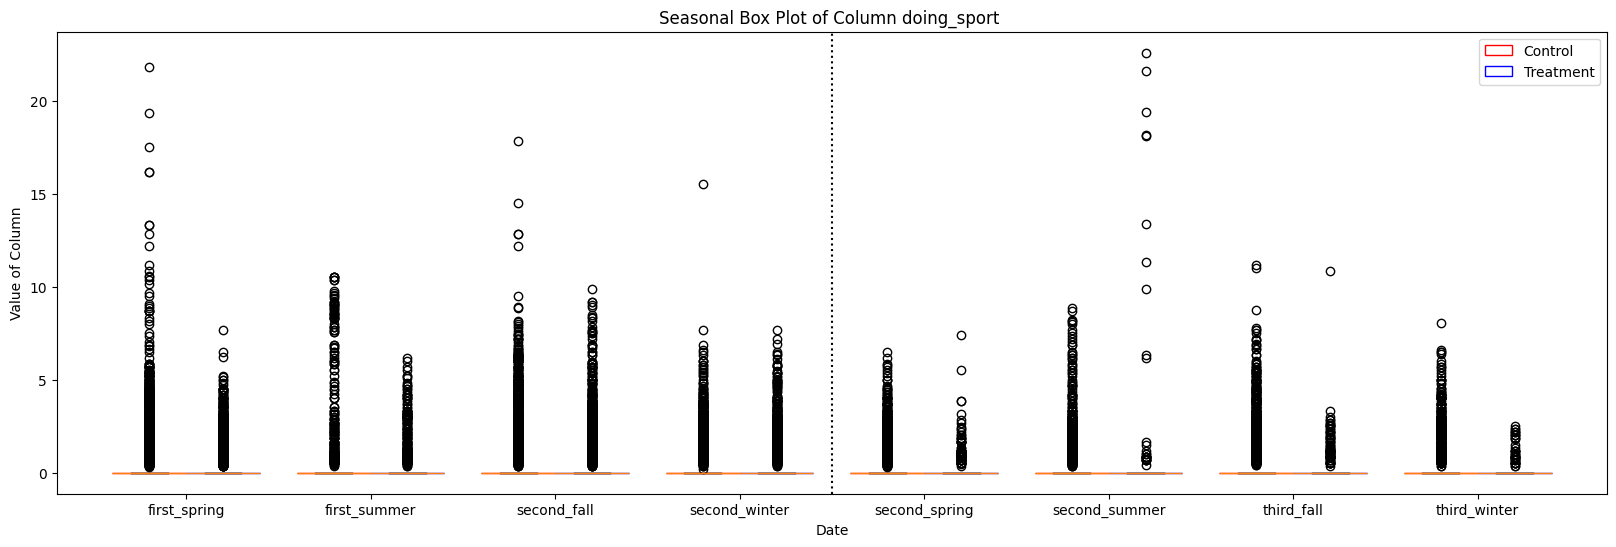

In [815]:
create_boxplot_comparison_per_season(df_covid.dropna(subset=['doing_sport']), 'doing_sport')

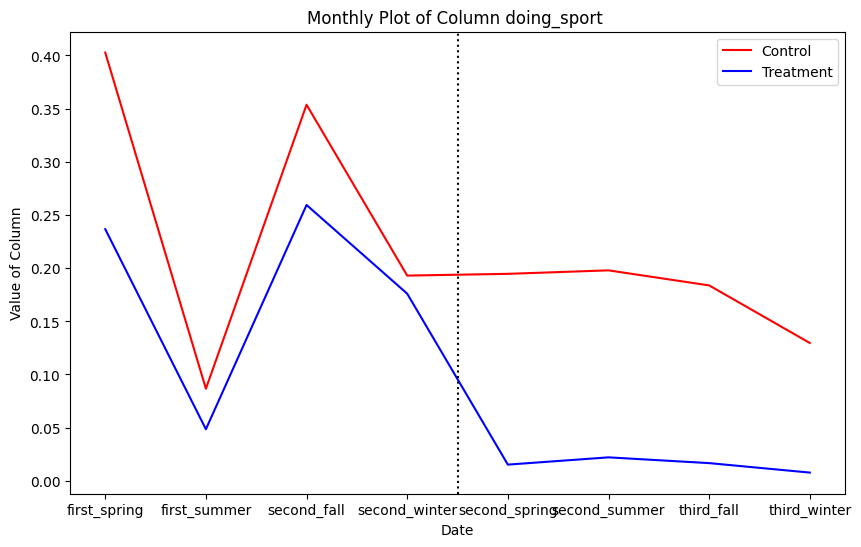

In [816]:
create_plot_comparison_per_season(df_covid, 'doing_sport')

## stress

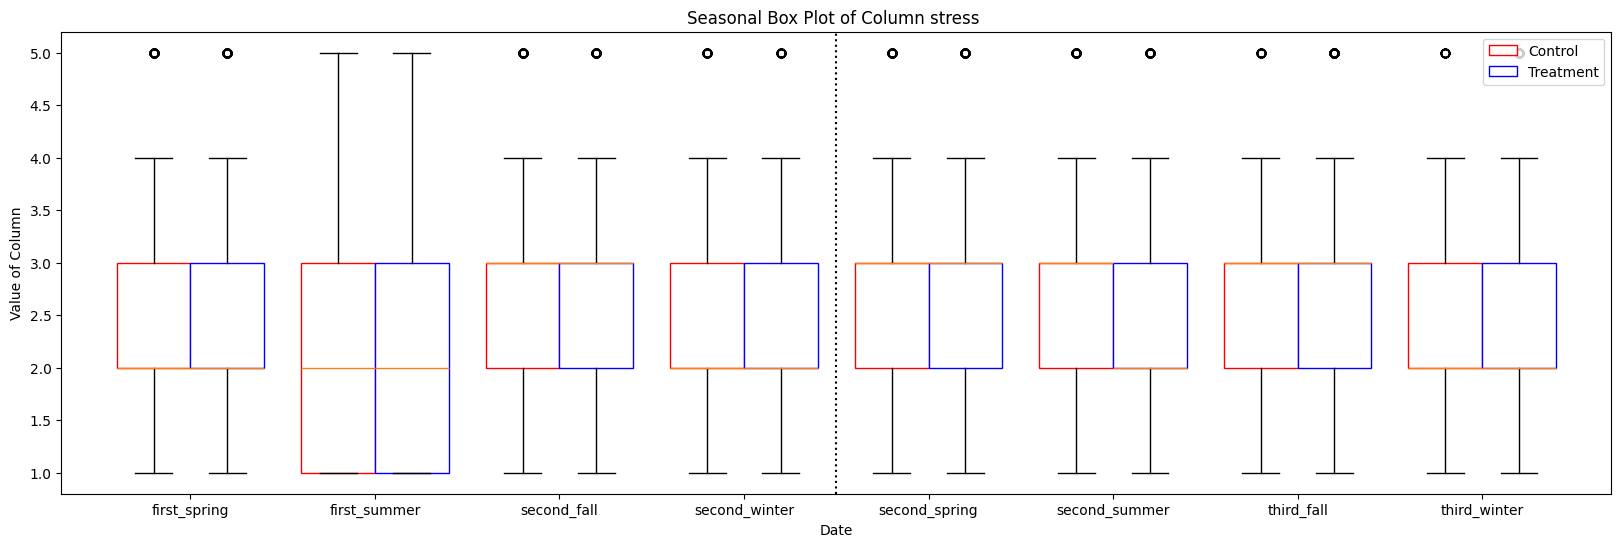

In [817]:
create_boxplot_comparison_per_season(df_covid.dropna(subset=['stress']), 'stress')

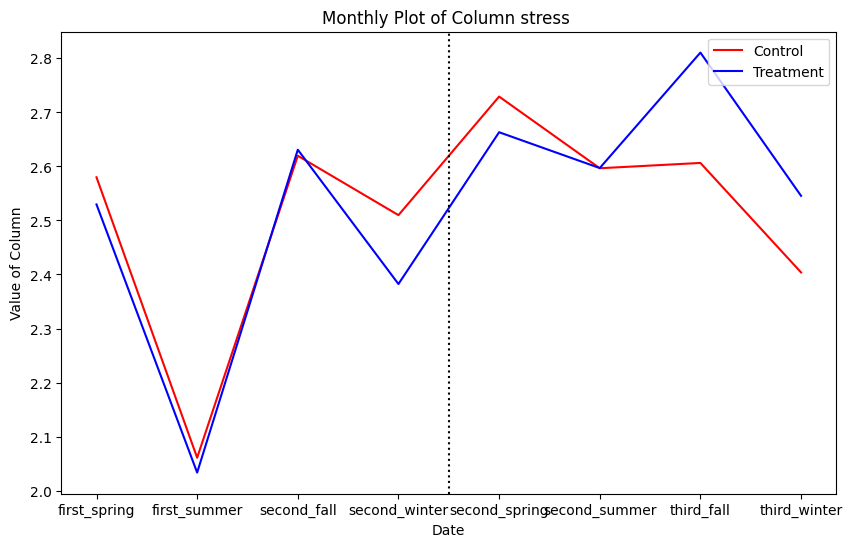

In [818]:
create_plot_comparison_per_season(df_covid, 'stress')

## phq4_score

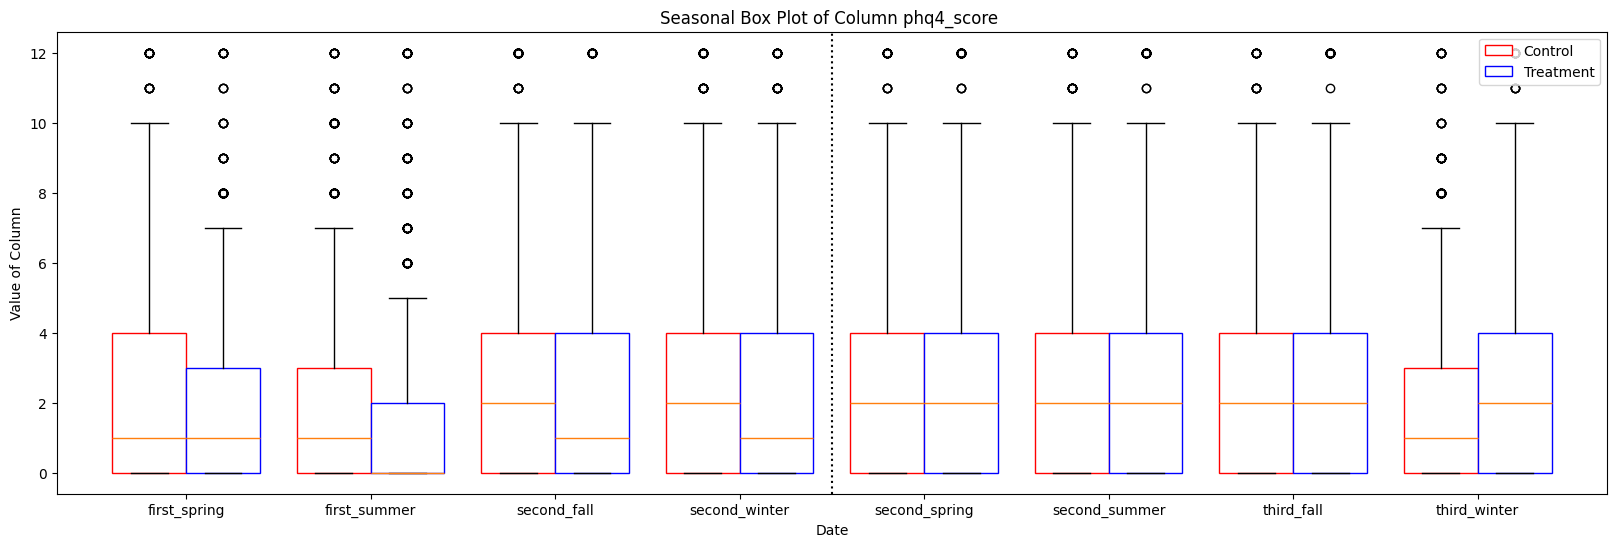

In [819]:
create_boxplot_comparison_per_season(df_covid.dropna(subset=['phq4_score']), 'phq4_score')

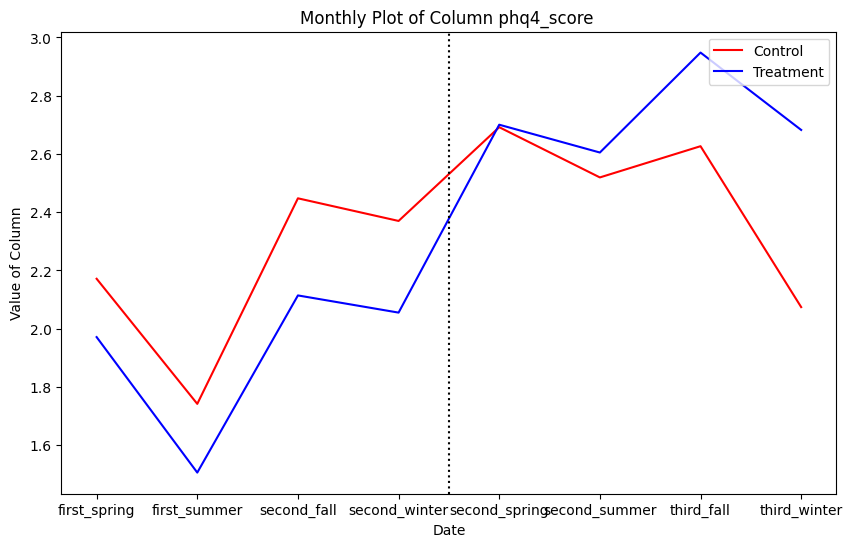

In [820]:
create_plot_comparison_per_season(df_covid, 'phq4_score')